## Introduction

This material was created by **Arman Seyed-Ahmadi**, later reorganized and enhanced by **Danie Benetton**.

Project financially supported by the University of British Columbia, Department of Chemical and Biological Engineering (CBHE).

July 2020

This Jupyter Notebook is an overview of the main functions used in the CHBE program course work. 

## Instructions
**Preferred method:**

To use this notebook, make sure Anaconda is installed [Link to Download](https://www.anaconda.com/products/individual)

This tutorial is best run in **JupyterLab.** [JupyterLab Introduction Video](https://www.youtube.com/watch?v=A5YyoCKxEOU). 

Ensure that you have the JupyterLab extension "@jupyterlab/toc" installed to navigate this document. This can be easily installed through the Extension Manager.

**Alternative method:**

UBC students and professors can also access this notebook through [Syzygy](https://ubc.syzygy.ca/). Log in with your CWL, upload this notebook to your files, and run the notebook.

## Matplotlib Settings

These settings are needed for most of the developed functions. Run the function below once after opening this document to ensure graphs are displayed properly.

In [3]:
%matplotlib inline

def load_matplotlib_settings():

    import matplotlib as mpl

    mpl.rcParams.update({'mathtext.fontset': 'cm'})
    mpl.rcParams.update({'axes.labelsize': 22})
    mpl.rcParams.update({'axes.titlesize': 16})
    mpl.rcParams.update({'axes.linewidth': 0.5})
    mpl.rcParams.update({'xtick.labelsize': 10})
    mpl.rcParams.update({'ytick.labelsize': 10})

    %config InlineBackend.figure_formats = ['svg']
    
load_matplotlib_settings()

# Root Finding

## Incremental Search

The incremental search method searches each small increment of the interval $ [a, b] $ and stores the locations where the function sign changes.

> **Note**: There are several drawbacks of the incremental search method
* It is slow.
* It might miss some of the roots if $ \Delta x $ is not sufficiently small.
* It might mistake function singularities (e.g., $ f(x) = \tan{x} $)

However, this method is useful to determine if there are multiple roots over an interval, and can be combined with more precise methods.

### Function

In [4]:
def interval_finder(function, a, b, delta_x=0.01, with_plot=True):
    '''
    This function implements the incremental search method and
    finds the intervals in [a, b] where the input function changes sign.
    The ouput of this function is a list that contains pairs of numbers.
    Each pair represents the lower bound and the upper bound of the
    corresponding intervals containing the roots.
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    load_matplotlib_settings()
    
    # initializing____________________
    intervals = []
    
    x_l, x_u = a, a + delta_x
    f = function

    # First check {a, b}
    if f(a) == 0:
        print(f'x = {a:g} is a root of the function!\n')
    elif f(b) == 0:
        print(f'x = {b:g} is a root of the function!\n')
    
    # main root-searching loop____________________
    while x_u <= b:

        if np.sign(f(x_l) * f(x_u)) == -1:
            intervals.append([x_l, x_u])

        x_l += delta_x
        x_u += delta_x

    if intervals == []:
        print('No intervals found.')
        return None
    else:
        # displaying intervals____________________
        print('The intervals where the function has at least a root:\n')
        for i in intervals:
            print(f'{i[0]:.10g}\t\t{i[1]:.10g}')
        print(' ')

        # plotting intervals____________________
        if with_plot:
            
            x = np.linspace(a, b, 100)
            y = f(x)

            fig, ax = plt.subplots(figsize=(4, 4))
            ax.axhline(y=0, color='black', linewidth=1, linestyle='-', alpha=0.5)
            ax.axvline(x=0, color='black', linewidth=1, linestyle='-', alpha=0.5)

            ax.plot(x, y, color='red') # plot the function

            for i in intervals:
                ax.plot(i, [0, 0], '-o', color='blue')

            ax.set_xlabel('$x$')
            ax.set_ylabel('$y$')
            
            ax.set_xlim(a, b)
            
        return intervals

### Example: Basic Root Finding
Find the roots of $ f(x) = x \sin{x} $ in the interval $ [0,10] $ using the incremental search method.

x = 0 is a root of the function!

The intervals where the function has at least a root:

3.14		3.15
6.28		6.29
9.42		9.43
 


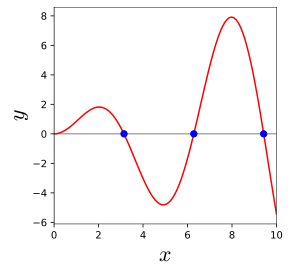

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Defining function and interval
def function(t): return t*np.sin(t)
a = 0
b = 10

intervals = interval_finder(function, a, b, delta_x=0.01, with_plot=True)

> Note: You must use `np.sin( )` and not `math.sin( )`, since Numpy provides the **vectorized** function which works on each element of the array

## Bisection Method

The **bisection** method is one of the bracketing methods that finds the root of a function by successively halving the interval containing the root. This process can be repeated until the desired accuracy is obtained. In this function, the stop criterion is the **relative error**, defined below:

$$ \epsilon_r = \frac{|x_r - x_{r,old}|}{x_{r,old}} $$
We can stop the program when, for example, the relative error is less than some small value.

### Function

In [6]:
def bisection(function, a, b, tol=1e-5, max_iter=100, conv_hist=True, with_plot=False):
    '''
    This function implements the bisecbtion method for finding the root of
    the input function in the interval [a, b] for which f(a).f(b) < 0.
    
    Returns:
    (root, f(root))
    '''

    import numpy as np
    import matplotlib.pyplot as plt
    load_matplotlib_settings()

    
    f = function
    iteration = 0
    history = []
    
    a_plot = a
    b_plot = b
    
    x_r_old = f(a) # initial guess for the root, can be any other value.
    eps_r = 100 # initial value for eps_r, can be any value bigger than ~1
    
    # initial check for sign change:____________________
    if np.sign(f(a) * f(b)) == 1:
        raise ValueError(f'Function does not change sign in [{a}, {b}]')
    elif np.sign(f(a) * f(b)) == 0:
        raise Exception(f'Either {a} or {b} is a root of the function!')
    
    while (eps_r >= tol) and (iteration < max_iter):
        
        x_r = (a + b) / 2.
        
        if abs(x_r_old) > 1.e-12:
            eps_r = abs(x_r - x_r_old) / abs(x_r_old)
        else:
            eps_r = abs(x_r - x_r_old)
        
        # convergence history____________________
        history.append([iteration, a, b, x_r, f(x_r), eps_r])
            
        # main root check block
        iteration += 1
        if iteration == max_iter: print('Max iteration reached!')
            
        if np.sign(f(a) * f(x_r)) == -1:
            b = x_r
        elif f(x_r) == 0:
            return x_r, f(x_r)
        else:
            a = x_r
            
        x_r_old = x_r
    
    # show convergence history____________________
    if conv_hist:
        import pandas as pd
        df = pd.DataFrame(history, columns=['Iteration', '$ a $', '$ b $', '$ x_r $', '$ f(x_r) $', '$ \epsilon_r $'])
        pd.options.display.float_format = '{:.10g}'.format
        display(df)
        
    # plotting the root____________________    
    if with_plot:
        
        x = np.linspace(a_plot, b_plot, 100)
        y = f(x)

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.axhline(y=0, color='black', linewidth=1, linestyle='-', alpha=0.5)
        ax.axvline(x=0, color='black', linewidth=1, linestyle='-', alpha=0.5)

        # plot the function
        f_curve = ax.plot(x, y, color='red', label='Function')
        # plot the root
        ax.plot(x_r, f(x_r), 'o', color='blue', markersize=5, label='Root')

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        
        ax.set_xlim(a_plot, b_plot)
        
        ax.legend(loc='best')
        fig.tight_layout()
        
    return x_r, f(x_r)

### Example 1: Basic Root Finding
<a id="biscetion_example"></a>
Find one of the roots of $ f(x) = x \sin{x} $ in the interval $ [1, 5] $ using the bisection method.

,Iteration,$ a $,$ b $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,1,4,2.5,1.49618036,1.970987764
1,1,2.5,4,3.25,-0.3516341872,0.3
2,2,2.5,3.25,2.875,0.7574072309,0.1153846154
3,3,2.875,3.25,3.0625,0.2419687888,0.0652173913
4,4,3.0625,3.25,3.15625,-0.04626059314,0.0306122449
5,5,3.0625,3.15625,3.109375,0.1001594373,0.01485148515
6,6,3.109375,3.15625,3.1328125,0.0275062215,0.007537688442
7,7,3.1328125,3.15625,3.14453125,-0.009240494944,0.003740648379
8,8,3.1328125,3.14453125,3.138671875,0.009167352579,0.001863354037
9,9,3.138671875,3.14453125,3.141601562,-2.798824623e-05,0.0009334163037


Root = 3.1415926537592895


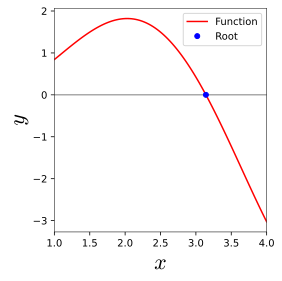

In [7]:
import numpy as np
def f(x): return x * np.sin(x)

root = bisection(f, 1, 4, tol=1e-10, conv_hist=True, max_iter=100, with_plot=True)
print(f'Root = {root[0]}')

### Example 2: Spherical Storage Tank Draining
You have a spherical storage tank containing oil. The tank has a diameter of 6 ft. You are asked to calculate the height *h* to which a dipstick 8 ft long would be wet with oil when immersed in the tank when it contains 4 ft<sup>3</sup> of oil. 

<p style="text-align:center;">
<img src="Images/Spherical storage tank.jpg" width=400>
</p>

The equation that gives the height, h, of the liquid in the spherical tank for the given volume and radius is given by    

\begin{align}
f(h) = h^3 - 9h^2 + 3.8197 = 0
\end{align}

Use the bisection method of finding roots of equations to find the height, *h*, to which the dipstick is wet with oil with a tolerance of 1x10<sup>-4</sup>.

,Iteration,$ a $,$ b $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,0,6,3,-50.1803,0.2145980051
1,1,0,3,1.5,-13.0553,0.5
2,2,0,1.5,0.75,-0.820925,0.5
3,3,0,0.75,0.375,2.606809375,0.5
4,4,0.375,0.75,0.5625,1.150022266,0.5
5,5,0.5625,0.75,0.65625,0.2263467285,0.1666666667
6,6,0.65625,0.75,0.703125,-0.2821486023,0.07142857143
7,7,0.65625,0.703125,0.6796875,-0.02407717972,0.03333333333
8,8,0.65625,0.6796875,0.66796875,0.1020955417,0.01724137931
9,9,0.66796875,0.6796875,0.673828125,0.0392487693,0.008771929825


Root = 0.6774444580078125


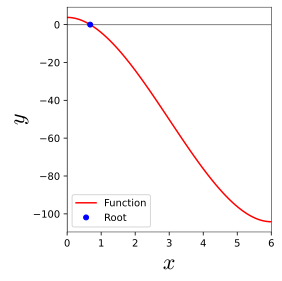

In [8]:
def f(h): return h**3 - 9*h**2 + 3.8197

root = bisection(f, 0, 6, tol=1e-4, conv_hist=True, max_iter=100, with_plot=True)
print(f'Root = {root[0]}')

Problem source: https://nm.mathforcollege.com/strippedfiles/mws/che/03nle/mws_che_nle_txt_bisection_examples.pdf

## False Position Method

The false position method is very similar to bisection, the only difference being the way we compute the new guess. The false position method typically improves convergence rate by assuming that the root is closer to the smaller value of $ f $. Convergence is, again, guaranteed.

### Function

In [9]:
def false_position(function, a, b, tol=1e-5, max_iter=100, conv_hist=True, with_plot=False):
    '''
    This function implements the false position method for finding the root of
    the input function in the interval [a, b] for which f(a).f(b) < 0.
    
    Returns:
    (root, f(root))
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    load_matplotlib_settings()
    
    f = function
    iteration = 0
    
    a_plot = a
    b_plot = b
    
    x_r_old = f(a) # initial guess for the root, can be any other value.
    eps_r = 100 # initial value for eps_r, can be any value bigger than ~1
    
    # initial check for sign change:____________________
    if np.sign(f(a) * f(b)) == 1:
        raise ValueError(f'Function does not change sign in [{a}, {b}]')
    elif np.sign(f(a) * f(b)) == 0:
        raise Exception(f'Either {a} or {b} is a root of the function!')
    
    history = []
    
    while (eps_r >= tol) and (iteration < max_iter):
                
        x_r = a - ((b - a) * f(a)) / (f(b) - f(a))

        if abs(x_r_old) > 1.e-12:
            eps_r = abs(x_r - x_r_old) / abs(x_r_old)
        else:
            eps_r = abs(x_r - x_r_old)
        
        # convergence history____________________
        history.append([iteration, a, b, x_r, f(x_r), eps_r])
        
        # main root check block
        iteration += 1
        if iteration == max_iter: print('Max iteration reached!')
            
        if f(a) * f(x_r) < 0:
            b = x_r
        elif f(x_r) == 0:
            return x_r, f(x_r)
        else:
            a = x_r
    
        x_r_old = x_r
        
    # show convergence history____________________
    if conv_hist:
        import pandas as pd
        df = pd.DataFrame(history, columns=['Iteration', '$ a $', '$ b $', '$ x_r $', '$ f(x_r) $', '$ \epsilon_r $'])
        pd.options.display.float_format = '{:.10g}'.format
        display(df)
        
    # plotting the root____________________
    if with_plot:
        x = np.linspace(a_plot, b_plot, 100)
        y = f(x)

        fig, ax = plt.subplots(figsize=(4, 4))
        
        # x,y=0 axis
        ax.axhline(y=0, color='black', linewidth=1, linestyle='-', alpha=0.5)
        ax.axvline(x=0, color='black', linewidth=1, linestyle='-', alpha=0.5)

        # plot the function
        f_curve = ax.plot(x, y, color='red', label='Function')
        # plot the root
        ax.plot(x_r, f(x_r), 'o', color='blue', markersize=5, label='Root')

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        
        ax.set_xlim(a_plot, b_plot)
        
        ax.legend(loc='best')
        
    return x_r, f(x_r)

### Example 1: Basic Root Finding
Find one of the roots of $ f(x) = x \sin{x} $ in the interval $ [1, 5] $ using the false position method.
> Compare results to bisection method done [**here**](#biscetion_example): the rate of convergence is faster. Why?

,Iteration,$ a $,$ b $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,1,4,1.652525493,1.647009413,0.963853208
1,1,1.652525493,4,2.479682347,1.524074414,0.5005410553
2,2,2.479682347,4,2.988786379,0.4549300592,0.2053101812
3,3,2.988786379,4,3.120898088,0.06458101929,0.04420245961
4,4,3.120898088,4,3.139260681,0.007320664485,0.005883752608
5,5,3.139260681,4,3.141337174,0.0008025465886,0.0006614594679
6,6,3.141337174,4,3.141564755,8.764553344e-05,7.244704782e-05
7,7,3.141564755,4,3.141589608,9.567691066e-06,7.911087583e-06
8,8,3.141589608,4,3.141592321,1.044394561e-06,8.635922562e-07
9,9,3.141592321,4,3.141592617,1.14003947e-07,9.426829928e-08


Root = 3.1415926535846412


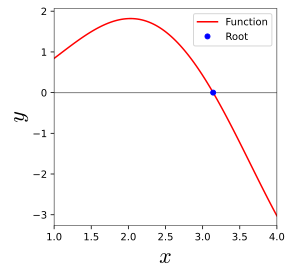

In [10]:
def f(x): return x * np.sin(x)

root = false_position(f, 1, 4, tol=1e-10, conv_hist=True, max_iter=100, with_plot=True)
print(f'Root = {root[0]}')

### Example 2: Fanning Friction Factor

> For fluid flow in pipes, friction is described by a dimensionless number, the Fanning friction factor  $f$. The Fanning friction factor is dependent on a number of parameters related to the size of the pipe and the fluid, which can all be represented by another dimensionless  quantity, the Reynolds number $Re$.  
>A formula that predicts f given Re is the von Karman equation:
$$
\begin{align}
\frac{1}{\sqrt{f}} & = 4\log_{10}(Re\sqrt{f}) - 0.4\\
\end{align}
$$
>Typical values for the Reynolds number for turbulent flow are 10,000 to 500,000 and for the Fanning friction factor are 0.001 to 0.01. Develop a function that uses the false position method to solve for $f$ given  a  user-supplied  value  of  $Re$  between  2500  and  1,000,000. Design the function so that it ensures that the absolute error in the result is $Ea< 0.00005$

**Solution:** Since the value of $Re$ needs to be user supplied, we take this as an input and type-convert to ensure the value is taken to be a number. The value of $Re$ is checked to ensure that is is within the supplied interval. The function is rearranged as such:
$$
\begin{align}
0 & = \frac{1}{\sqrt{f}} - 4\log_{10}(Re\sqrt{f}) + 0.4\\
\end{align}
$$
The false position method is then used to find the value of $f$ for which this function is 0.

In [11]:
import numpy as np

Re = input()
# Re - user-supplied value of Re, between 2500 and 1000000
# Type convert
Re = float(Re)

if Re<2500 or Re>1e9:
  raise Exception('Re must be between 2500 and 1000000!\n')

xl = 0.001
xu = 0.02
Ea = 0.00005

# define the function
def func(f): return 1./np.sqrt(f) - 4*np.log10(Re*np.sqrt(f)) + 0.4

root = false_position(func, xl, xu, tol=Ea, conv_hist=True, max_iter=100, with_plot=False)
print('False position method:\n')
print('Root: \n', root)

 5000


,Iteration,$ a $,$ b $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,0.001,0.02,0.01725229406,-3.256210075,0.9992572278
1,1,0.001,0.01725229406,0.01525400571,-2.665947832,0.1158273995
2,2,0.001,0.01525400571,0.01378640195,-2.158019486,0.09621103989
3,3,0.001,0.01378640195,0.01269940586,-1.729674158,0.07884552445
4,4,0.001,0.01269940586,0.01188855087,-1.374739871,0.06384983686
5,5,0.001,0.01188855087,0.01128009846,-1.085002175,0.05117969529
6,6,0.001,0.01128009846,0.01082131368,-0.8514164231,0.04067205481
7,7,0.001,0.01082131368,0.01047402906,-0.6650153319,0.03209264877
8,8,0.001,0.01047402906,0.01021032582,-0.5174917921,0.02517686731
9,9,0.001,0.01021032582,0.01000959342,-0.4015061525,0.01965974459


False position method:

Root: 
 (0.009358064746704479, -0.0009555124942298709)


## Newton-Raphson Method

The Newton-Raphson method is an **open method** where an initial guess for the root is made, and the slope of the tangent is found using an inputted derivative. Using the slope, a new approximation of the root is found by the intersection of the slope with the x axis. This approximation is used as a new guess and the process is repeated until the stop criterion is met.

Since Newton-Raphson method is an open method, **convergence is NOT guaranteed**. So, your initial guess needs to be pretty good and when it is, convergence is very fast. Another limitation is that the derivative must be provided.

### Function

In [12]:
def Newton_Raphson(function, derivative, a, tol=1e-5, max_iter=100, conv_hist=True):
    '''
    This function implements the Newton-Raphson method. You need to supply
    the derivative of the function in addition to the function itself, but
    only one initial guess is required.
    
    Returns:
    (root, f(root))
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    load_matplotlib_settings()
    
    f = function
    df = derivative
    
    iteration = 0
    
    x_r_old = f(a) # initial guess for the root, can be any other value.
    eps_r = 100 # initial value for eps_r, can be any value bigger than ~1
    
    history = []
    
    while (eps_r >= tol) and (iteration < max_iter):
        
        x_r = a - (f(a) / df(a))
        
        if abs(x_r_old) > 1.e-12:
            eps_r = abs(x_r - x_r_old) / abs(x_r_old)
        else:
            eps_r = abs(x_r - x_r_old)
        
        # convergence history____________________
        history.append([iteration, a, x_r, f(x_r), eps_r])

        iteration += 1
        if iteration == max_iter: print('Max iteration reached!')
        
        a = x_r
        x_r_old = x_r
    
    # show convergence history____________________
    if conv_hist:
        import pandas as pd
        df = pd.DataFrame(history, columns=['Iteration', '$ a $', '$ x_r $', '$ f(x_r) $', '$ \epsilon_r $'])
        pd.options.display.float_format = '{:.10g}'.format
        display(df)
        
    return x_r, f(x_r)

### Example 1
Find one of the roots of $ f(x) = x \sin{x} $ with the initial guess of 4 using the Newton-Raphson Method.

In [13]:
def f(x): return x * np.sin(x)
def df(x): return np.sin(x) + x * np.cos(x)

root = Newton_Raphson(f, df, 4, tol=1e-12, conv_hist=True, max_iter=100)
print(f'Root = {root[0]}')

,Iteration,$ a $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,4,3.102084994,0.1225242394,2.024734
1,1,3.102084994,3.14212341,-0.001667702175,0.01290693725
2,2,3.14212341,3.141592743,-2.814507407e-07,0.0001688879741
3,3,3.141592743,3.141592654,-7.986150256e-15,2.851691975e-08
4,4,3.141592654,3.141592654,3.847341387e-16,8.481479151e-16


Root = 3.141592653589793


You can see that this method converges much faster than the closed methods. However, if your initial guess is off, either the method diverges or it converges to another root.

 **Question:** What are the main limitations of the Newton-Raphson method?

### Example 2: Convergence of Newton-Raphson
(a) Apply the Newton-Raphson method to the function $f(x) = tanh(x^2 − 9)$ to evaluate its known real root at $x = 3$. Use an initial guess of $x_0 = 3.1$  
(b) Modify the example to use an initial guess of $x_0 = 3.2$. It will not converge. Why?
> **Hint:** Look at a graph of the function.

In [14]:
def f(x): return np.tanh(x**2 - 9)
def df(x): return 2*x*(np.cosh(x**2-9))**(-2)

root = Newton_Raphson(f, df, 3.1, tol=1e-12, conv_hist=True, max_iter=100)
print(f'Root = {root[0]}')

,Iteration,$ a $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,3.1,2.975324292,-0.1463860761,4.468068578
1,1,2.975324292,3.000463007,0.002778246698,0.00844906721
2,2,3.000463007,3.000000033,2.00047868e-07,0.0001543005983
3,3,3.000000033,3,0,1.111377022e-08
4,4,3,3,0,0


Root = 3.0


## Secant Method

The secant method is a versatile alternative for the Newton-Raphson method: instead of having to provide the analytical formula for the derivative, the method uses a finite-difference approximation to the derivative:

$$ f'(a) = \frac{f(a + \Delta x) - f(a)}{\Delta x} $$

This is the only difference of this method with the Newton-Raphson method, therefore, writing the code for this method is pretty easy.

### Function

In [15]:
def secant(function, a, delta_x=1e-10, tol=1e-5, max_iter=100, conv_hist=True):
    '''
    This function implements the secant method. Contrary to the Newton-Raphson
    method, there is no need to supply the function derivate. The derivative 
    is estimated by a finite-difference approximation with the step size of 
    delta_x.
    
    Returns:
    (root, f(root))
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    load_matplotlib_settings()
    
    f = function
    df = lambda a: (f(a + delta_x) - f(a)) / delta_x
    
    iteration = 0
    
    x_r_old = f(a) # initial guess for the root, can be any other value.
    eps_r = 100 # initial value for eps_r, can be any value bigger than ~1
    
    history = []
    
    while (eps_r >= tol) and (iteration < max_iter):
        
        x_r = a - (f(a) / df(a))
        
        if abs(x_r_old) > 1.e-12:
            eps_r = abs(x_r - x_r_old) / abs(x_r_old)
        else:
            eps_r = abs(x_r - x_r_old)
        
        # convergence history____________________
        history.append([iteration, a, x_r, f(x_r), eps_r])

        iteration += 1
        if iteration == max_iter: print('Max iteration reached!')
        
        a = x_r
        x_r_old = x_r
    
    # show convergence history____________________
    if conv_hist:
        import pandas as pd
        df = pd.DataFrame(history, columns=['Iteration', '$ a $', '$ x_r $', '$ f(x_r) $', '$ \epsilon_r $'])
        pd.options.display.float_format = '{:.10g}'.format
        display(df)
        
    return x_r, f(x_r)

### Example 1
Find one of the roots of $ f(x) = x \sin{x} $ with the initial guess of 4 using the Secant Method.

In [16]:
def f(x): return x * np.sin(x)

root = secant(f, 4, delta_x=1e-5, tol=1e-12, conv_hist=True, max_iter=100)
print(f'Root = {root[0]}')

,Iteration,$ a $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,4,3.102082703,0.1225312485,2.024733244
1,1,3.102082703,3.142123335,-0.001667465857,0.0129076609
2,2,3.142123335,3.141592745,-2.866707003e-07,0.0001688635175
3,3,3.141592745,3.141592654,-9.204125493e-13,2.904571973e-08
4,4,3.141592654,3.141592654,3.847341387e-16,9.329627066e-14


Root = 3.141592653589793


Obviously, the convergence imporves if we select smaller $ \Delta x $, because approximation of the derivative would be more accurate. Try with different values of $ \Delta x $

### Example 2: Liquid Height

>The volume of liquid $V$ in a hollow horizontal cylinder of radius $r$ and length $L$ is related to the depth of the liquid $h$ by:  
$$
\begin{align}
V = [r^2cos^{-1}(\frac{r-h}{r})-(r-h)\sqrt{2rh-h^2}]L
\end{align}
$$ 
Determine $h$ using the Secant method given $r$ = 2 m, $L$ = 5 m, and $V$ = 8 m<sup>3</sup>.

In [17]:
r = 2.
L = 5.
V = 8.

def func(h): return V - (r**2*np.arccos((r-h)/r)-(r-h)*np.sqrt(2*r*h-h**2))*L

root = secant(func, 0.5, delta_x=1e-6, tol=1e-12, conv_hist=True, max_iter=100)
print(f'Root = {root[0]}')

,Iteration,$ a $,$ x_r $,$ f(x_r) $,$ \epsilon_r $
0,0,0.5,0.7620715681,-0.3445340912,0.7801853461
1,1,0.7620715681,0.7401384392,-0.00191393583,0.02878093053
2,2,0.7401384392,0.7400152221,-6.207408987e-08,0.0001664785333
3,3,0.7400152221,0.7400152181,-1.776356839e-14,5.400593416e-09
4,4,0.7400152181,0.7400152181,0,1.500270532e-15


Root = 0.7400152180559405


## Golden Minimum

The golden number minimum search is a bracketing method very similar in principle to the bisection method for root finding except that it find the minimum point of a function evaluated over the interval $ [a, b] $.

### Function

In [18]:
def golden_minimum(function, a, b, tol=1e-5, max_iter=100, conv_hist=True, with_plot=False):
    '''
    This function implements the golden number minimum search for finding the minimum of
    the input function in the interval [a, b].
    
    Returns:
    (xmin, f(xmin))
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    f = function
    iteration = 0
    history = []
    
    phi = ( 1. + 5.**0.5 ) /  2.;
    
    a_plot = a
    b_plot = b
    
    xmin = a # initial guess for the min, can be any other value.
    eps_r = 1 # initial value for eps_r, can be any value bigger than ~1
    
    while (eps_r >= tol) and (iteration < max_iter):
        
        d = ( phi - 1. ) * ( b - a )
        x1 = a + d
        x2 = b - d
        
        # Compute f at x1 and x2
        fx1 = f(x1)
        fx2 = f(x2)
        
        # Update a, b and xmin
        if fx1 < fx2:
            xmin = x1
            a = x2
            fxmin = fx1
        else:
            xmin = x2
            b = x1
            fxmin = fx2
            
        # Compute relative error eps_r
        eps_r = ( 2. - phi ) * np.abs( b - a )
        if abs(xmin) > 1.e-12:
            eps_r = eps_r / np.abs( xmin )
        
        # convergence history____________________
        history.append([iteration, a, b, xmin, fxmin, eps_r])
            
        # main minimum check block
        iteration += 1
        if iteration == max_iter: print('Max iteration reached!')
            
    # show convergence history____________________
    if conv_hist:
        import pandas as pd
        df = pd.DataFrame(history, columns=['Iteration', '$ a $', '$ b $', '$ x_{min} $', '$ f(x_{min}) $', '$ \epsilon_r $'])
        pd.options.display.float_format = '{:.10g}'.format
        display(df)
        
    # plotting the minimum____________________    
    if with_plot:
        
        x = np.linspace(a_plot, b_plot, 100)
        y = f(x)

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.axhline(y=0, color='black', linewidth=1, linestyle='-', alpha=0.5)
        ax.axvline(x=0, color='black', linewidth=1, linestyle='-', alpha=0.5)

        # plot the function
        f_curve = ax.plot(x, y, color='red', label='Function')
        # plot the minimum
        ax.plot(xmin, fxmin, 'o', color='blue', markersize=5, label='Minimum')

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        
        ax.set_xlim(a_plot, b_plot)
        
        ax.legend(loc='best')

    return xmin, fxmin

### Example
Compute the minimum of $\frac{x^2}{10}-2\sin(x)$ over $[0,4]$:

,Iteration,$ a $,$ b $,$ x_{min} $,$ f(x_{min}) $,$ \epsilon_r $
0,0,0,2.472135955,1.527864045,-1.764720248,0.6180339887
1,1,0.94427191,2.472135955,1.527864045,-1.764720248,0.3819660113
2,2,0.94427191,1.88854382,1.527864045,-1.764720248,0.2360679775
3,3,1.304951685,1.88854382,1.527864045,-1.764720248,0.1458980338
4,4,1.304951685,1.66563146,1.527864045,-1.764720248,0.09016994375
5,5,1.304951685,1.527864045,1.4427191,-1.775474795,0.05901699437
6,6,1.39009663,1.527864045,1.4427191,-1.775474795,0.03647450844
7,7,1.39009663,1.475241575,1.4427191,-1.775474795,0.02254248594
8,8,1.39009663,1.4427191,1.422619105,-1.775699144,0.01412886618
9,9,1.410196625,1.4427191,1.422619105,-1.775699144,0.008732119523


Minimum is -1.77572565 and is attained at x = 1.42755177 


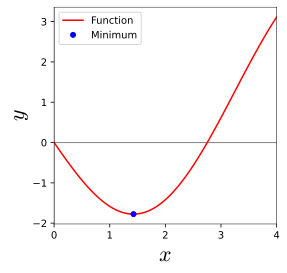

In [19]:
import numpy as np
def f(x): return x**2. / 10. - 2. * np.sin(x)

( xmin, fxmin ) = golden_minimum(f, 0., 4., tol=1.e-8, max_iter=100, with_plot=True, conv_hist=True)
print(f'Minimum is {fxmin:.8f} and is attained at x = {xmin:.8f} ')

# Solution of Linear (and Nonlinear) Systems

There are several computational methods to solve linear systems of the form

$$Ax=b$$

where $A$ is a $n\times n$ matrix, $x$ is a $n$ column vector containing the solution and $b$ is a $n$ column vector named the right-hand-side (rhs) vector.

**Important Remarks**: 
1. Recall Python indexes matrices from 0
2. We will use np.array for vectors and np.matrix for matrices.
3. In the math form of a linear system, the solution vector and the right-hand-side vector are column vectors. For the sake of coherence, we define them as column vectors in the Python codes below.

## Gauss Elimination

The principle of Gauss elimination is to manipulate the linear system through adding/subtracting rows, multiplying rows by a constant factor and swapping rows such that the matrix resulting from these manipulations is upper triangular. 

### Function

In [20]:
def GaussElimination( A, b ):

    import numpy as np
    
    # Make a copy so as not to modify global variables
    # Multiply by 1.0 so as to convert everything to float (numpy related)
    A = A.copy() * 1.0
    b = b.copy() * 1.0
    
    # Check the matrix and rhs sizes
    nrow = A.shape[0]
    ncol = A.shape[1]
    if nrow != ncol:
        raise ValueError('Matrix A is not a square matrix')
    bsize = b.size
    if nrow != bsize:
        raise ValueError('Number of rows of matrix A and rhs b do not match')
    
    # Gauss elimination
    n = ncol
    for k in range(0,n-1):
        for i in range(k+1,n):
            # Compute factor
            factor = A[i,k] / A[k,k]
            
            # Update matrix coefficients
            for j in range(k,n):
                A[i,j] = A[i,j] - factor * A[k,j]
        
            # Update rhs vector
            b[i] = b[i] - factor * b[k]
        
    # Test if solution is unique
    if A[n-1,n-1] == 0:
        raise ValueError('No unique solution')
    
    # Backward substitution
    x = np.transpose([np.zeros(ncol)])
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in range(n-2,-1,-1):
        sumx = 0
        for j in range(i+1,n):
            sumx = sumx + A[i,j] * x[j]
        x[i] = ( b[i] - sumx ) / A[i,i]
    
    return x

### Example 1

We would like to solve the following linear system by Gauss elimination:

$$
\begin{array}{ccccccccc}
x_1 & + & x_2 & & & + & 3x_4 & = & 4 \\
2x_1 & + & x_2 & - & x_3 & + & x_4 & = & 1 \\
3x_1 & - & x_2 & - & x_3 & + & 2x_4 & = & -3 \\
-x_1 & + & 2x_2 & + & 3x_3 & - & x_4 & = & 4
\end{array}
$$

that we can re-write in a matrix-vector form as:

$$ \left[
\begin{array}{cccc}
1 & 1 & 0 & 3 \\
2 & 1 & -1 & 1 \\
3 & -1 & -1 & 2 \\
-1 & 2 & 3 & -1
\end{array}
\right]
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}
\right]
=
\left[
\begin{array}{c}
4 \\
1 \\
-3 \\
4
\end{array}
 \right] $$
 
The solution is $x(-1,2,0,1)$. 

In [21]:
import numpy as np

# Create matrix A 
A = np.matrix([[1.,1.,0.,3.],
              [2.,1.,-1.,1.],
              [3.,-1.,-1.,2.],
              [-1.,2.,3.,-1.]])

# Create rhs vector
b = np.transpose([[4.,1.,-3.,4.]])

# We store A and b in their original form in separate variables for further computing
A_original = np.copy(A)
b_original = np.copy(b)

# Solve the linear system
x = GaussElimination( A, b )
print('Solution is x=',x)

# Check that x is indeed solution
res = A_original.dot(x) - b_original
print('Residual is res=',res)

Solution is x= [[-1.]
 [ 2.]
 [ 0.]
 [ 1.]]
Residual is res= [[0.]
 [0.]
 [0.]
 [0.]]


### Example 2: System of Reactors

The figure below shows  three  reactors  linked  by  pipes.  As  indicated,  the  rate  of  transfer  of  chemicals  through  each  pipe  is  equal  to  a  flow  rate  ($Q$,  with  units  of  cubic  meters  per second)  multiplied  by  the  concentration  of  the  reactor  from which the flow originates ($c$, with units of milligrams per cubic meter). If the system is at a steady state, the transfer into each reactor will balance the transfer out.  

<p style="text-align:center;">
<img src="images/sys_reactors.png" width=400>
</p>

Develop mass-balance equations for the reactors and solve the three simultaneous linear algebraic equations for their concentrations using Gauss elimination.

**Solution:** The mass balances can be written as:

$$
\begin{align}
Q_{21}c_2 + 500 = Q_{12}c_1 + Q_{13}c_1\\
Q_{12}c_1 = Q_{21}c_2 + Q_{23}c_2\\
Q_{13}c_1 + Q_{23}c_2 = Q_{33}c_3 + 500
\end{align}
$$

Collecting terms:

$$
\begin{array}{ccccccccc}
(Q_{12}+Q_{13})c_1 & - & Q_{21}c_2 & & & = & 500 \\
-Q_{12}c_1 & + & (Q_{21}+Q_{23})c_2 & & & = & 0 \\
-Q_{13}c_1 & - & Q_{23}c_2 & + & Q_{33}c_3 & = & 500 
\end{array}
$$

that we can re-write in a matrix-vector form with substituted values as:

$$ \left[
\begin{array}{cccc}
130 & -30 & 0  \\
-90 & 90 & 0  \\
-40 & -60 & 120
\end{array}
\right]
\left[
\begin{array}{c}
c_1 \\
c_2 \\
c_3 
\end{array}
\right]
=
\left[
\begin{array}{c}
500 \\
0 \\
500 
\end{array}
 \right] $$

In [22]:
import numpy as np

# Create matrix A 
A = np.matrix([[130.,-30.,0.],
              [-90.,90.,0.],
              [-40.,-60.,120.]])

# Create rhs vector
b = np.transpose([[500.,0.,500.]])

# We store A and b in their original form in separate variables for further computing
A_original = np.copy(A)
b_original = np.copy(b)

# Solve the linear system
x = GaussElimination( A, b )
print('Solution is x=',x)

# Check that x is indeed solution
res = A_original.dot(x) - b_original
print('Residual is res=',res)

Solution is x= [[5.        ]
 [5.        ]
 [8.33333333]]
Residual is res= [[0.00000000e+00]
 [0.00000000e+00]
 [1.13686838e-13]]


## Gauss Elimination with Pivoting

The standard Gauss elimination algorithm would fail to solve the following matrix.

$$ \left[
\begin{array}{ccc}
0 & 2 & 3 \\
7 & -5 & 4 \\
8 & -1 & -1
\end{array}
\right]
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 
\end{array}
\right]
=
\left[
\begin{array}{c}
5 \\
6 \\
6
\end{array}
 \right] $$

In the Gaussian elimination algorithm, it is required that pivot elements be non-zero. Gauss elimination with pivoting is used for matrices of this type.

### Function

In [23]:
def GaussPivoting( A, b ):

    import numpy as np
    
    # Make a copy so as not to modify global variables
    # Multiply by 1.0 so as to convert everything to float (numpy related)
    A = A.copy() * 1.0
    b = b.copy() * 1.0
    
    # Check the matrix and rhs sizes
    nrow = A.shape[0]
    ncol = A.shape[1]
    if nrow != ncol:
        raise ValueError('Matrix A is not a square matrix')
    bsize = b.size
    if nrow != bsize:
        raise ValueError('Number of rows of matrix A and rhs b do not match')

    # Gauss elimination
    n = ncol
    for k in range(0,n-1):
        # Partial pivoting
        # Look for largest pivot A[k,j] for j=k to n-1
        max = np.abs( A[k,k] )
        imax = k
        for j in range(k+1,n):
            if np.abs( A[j,k] ) > max:
                max = np.abs( A[j,k] )
                imax = j
                
        # If imax != k, swap k and imax
        if imax != k:
            print(f'Swap {k} and {imax}')
            
            # Swap matrix coefficients
            for j in range(k,n):
                tmp = A[k,j].copy()
                A[k,j] = A[imax,j].copy()
                A[imax,j] = tmp
       
            # Swap right hand side vector
            tmp = b[k].copy()
            b[k] = b[imax].copy()
            b[imax] = tmp
        
        # Actual elimination
        for i in range(k+1,n):
            # Compute factor
            factor = A[i,k] / A[k,k]
            
            # Update matrix coefficients
            for j in range(k,n):
                A[i,j] = A[i,j] - factor * A[k,j]
        
            # Update rhs vector
            b[i] = b[i] - factor * b[k]
                   
    # Test if solution is unique
    if A[n-1,n-1] == 0:
        raise ValueError('No unique solution')
    
    # Backward substitution
    x = np.transpose([np.zeros(ncol)])
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in range(n-2,-1,-1):
        sumx = 0
        for j in range(i+1,n):
            sumx = sumx + A[i,j] * x[j]
        x[i] = ( b[i] - sumx ) / A[i,i]
  
    return x

### Example 1

Using Gauss elimination with pivot to solve the following system

$$
\begin{array}{ccccccc}
 & & 2x_2 & + & 3x_3 & = & 5 \\
7x_1 & - & 5x_2 & + & 4x_3 & = & 6 \\
8x_1 & - & x_2 & - & x_3 &  = & 6 
\end{array}
$$

that we can re-write in a matrix-vector form as:

$$ \left[
\begin{array}{ccc}
0 & 2 & 3 \\
7 & -5 & 4 \\
8 & -1 & -1
\end{array}
\right]
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 
\end{array}
\right]
=
\left[
\begin{array}{c}
5 \\
6 \\
6
\end{array}
 \right] $$
 
It is straightforward to check that the solution is $x=(1,1,1)$. Use the `GaussPivoting(A, b)` function to confirm this solution.

In [24]:
import numpy as np

# Create matrix A 
A = np.matrix([[0.,2.,3.],
               [7.,-5.,4.],
               [8.,-1.,-1.]])

# Create rhs vector
b = np.transpose([[5.,6.,6.]])

# We store A and b in their original form in separate variables for further computing
A_original = np.copy(A)
b_original = np.copy(b)

# Solve the linear system
x = GaussPivoting( A, b )
print('Solution is x=',x)

# Check that x is indeed solution
res = A_original.dot(x) - b_original
print('Residual is res=',res)

Swap 0 and 2
Solution is x= [[1.]
 [1.]
 [1.]]
Residual is res= [[0.]
 [0.]
 [0.]]


## Gauss Elimination for Tridiagonal Systems

With the matrix A in the linear system is tri-diagonal, the Gauss elimination procedure simplifies a lot. The following notation is used to  represent the matrix A by 3 vectors:
* f for the main diagonal
* g for the superdiagonal
* e for the subdiagonal

The linear system can then be written as follows

$$ \left[
\begin{array}{ccccc}
f_1 & g_1 &  &  &  \\
 e_2 & f_2 & g_2 &  &  \\
 &  \ddots & \ddots & \ddots &  \\
 &  &  \ddots & \ddots & g_{n-1} \\
 &  &  &  e_{n} & f_{n}
\end{array}
\right]
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_n
\end{array}
\right]
=
\left[
\begin{array}{c}
b_1 \\
b_2 \\
\vdots \\
\vdots \\
b_n
\end{array} \right] $$

This is a special case of Gauss elimination that reduces the operations needed to solve the system. During solving, only the main diagonal and the rhs vector are modified.

### Function

In [25]:
def Tridiag(e, f, g, b):

    import numpy as np
    
    n = f.size
    
    # Make a copy so as not to modify global variables
    # Multiply by 1.0 so as to convert everything to float (numpy related)
    f = f.copy() * 1.0
    b = b.copy() * 1.0
    
    # Gauss elimination
    for j in range(1,n):
        factor = e[j] / f[j-1] * 1.0 # Just to make it float
        f[j] = f[j] - factor * g[j-1]
        b[j] = b[j] - factor * b[j-1]
    
    # Backward substitution
    x = np.transpose([np.zeros(n)])
    x[n-1] = b[n-1] / f[n-1]
    for i in range(n-2,-1,-1):
        x[i] = ( b[i] - g[i] * x[i+1] ) / f[i]
    
    return x

### Example 1

Let's take the following matrix:

$$ \left[
\begin{array}{cccc}
2.04 & -1 &  &  \\
 -1 & 2.04 & -1 &  \\
 & -1 & 2.04 & -1 \\
 &  & -1 & 2.04
\end{array}
\right]
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}
\right]
=
\left[
\begin{array}{c}
40.8 \\
0.8 \\
0.8 \\
200.8
\end{array} \right] $$

The solution is $x=(65.97,93.778,124.538,159.48)$.

In [26]:
import numpy as np

# Create the matrix as the three vectors e,f,g
e = np.zeros(4)
e.fill(-1)
f = np.zeros(4)
f.fill(2.04)
g = np.zeros(4)
g.fill(-1)

# Create the rhs vector
b = np.transpose([[40.8,0.8,0.8,200.8]])

# Solve the system
x = Tridiag( e, f, g, b)
print('Solution is x=',x)

Solution is x= [[ 65.96983437]
 [ 93.77846211]
 [124.53822833]
 [159.47952369]]


### Example 2 

A noninsulated uniform rod is positioned between two walls of constant but different temperatures. The finite-difference representation employs four interior nodes (six total).

<p style="text-align:center;">
<img src="images/uniform_rod.png" width=400>
</p>

The following differential equation derives from a heat balance for a long, thin rod:

$$
\frac{d^2T}{dx^2} + h'(T_a-T)  = 0
$$

where $T$ = temperature (°C), $x$ = distance along the rod (m), $h’$ = heat transfer coefficient between the rod and the ambient air (m<sup>2</sup>), and $T_a$ = the temperature of the surroundings air (°C). This equation can be transformed into a set of linear algebraic equations by using a finite-divided difference approximation for the second derivative:

$$
\frac{d^2T}{dx^2} = \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}
$$

where $T_i$ designates the temperature at the node $i$. This approximation can be substituted into the first equation to give:

$$
-T_{i-1} + (2+h'\Delta x^2)T_i - T_{i+1} = h'\Delta x^2T_a
$$

This equation can be written for each of the interior nodes of the rod resulting in a tridiaginal system of equations. The first and last nodes at the rods ends are fixed by the boundary conditions.

**Specifications:** Develop a numerical solution forthe final equation for a 10 metre rod with $T_a$ = 20, $T(x=0)$ = 40, $T(x=10)$ = 200, $\Delta x$ = 2 m,and $h’$ = 0.05.  Use four interior nodes (six total) as shown in the figure above. Develop and solve a tridiagonal matrix.

**Solution:** There are 6 temperatures total, of which 4 are unknown. The end temperatures are boundary conditions. Substituting the parameter values, the heat-balance equations can be written for the four interior nodes as:

$$
\begin{array}{ccccccccc}
-40 & + & 2.2T_1 & - & T_2 & = & 4 \\
-T_1 & + & 2.2T_2 & - & T_3 & = & 4 \\
-T_2 & + & 2.2T_3 & - & T_4 & = & 4 \\
-T_3 & + & 2.2T_4 & - & 200 & = & 4
\end{array}
$$

that we can re-write in a matrix-vector form as:

$$ \left[
\begin{array}{cccc}
2.2 & -1 & 0 & 0 \\
-1 & 2.2 & -1 & 0 \\
0 & -1 & 2.2 & -1 \\
0 & 0 & -1 & 2.2
\end{array}
\right]
\left[
\begin{array}{c}
T_1 \\
T_2 \\
T_3 \\
T_4
\end{array}
\right]
=
\left[
\begin{array}{c}
44 \\
4 \\
4 \\
204
\end{array}
 \right] $$

In [27]:
import numpy as np

# Create the matrix as the three vectors e,f,g
e = np.zeros(4)
e.fill(-1)
f = np.zeros(4)
f.fill(2.2)
g = np.zeros(4)
g.fill(-1)

# Create the rhs vector
b = np.transpose([[44,4,4,204]])

# Solve the system
x = Tridiag( e, f, g, b)
print('Solution is x=',x)

Solution is x= [[ 50.78662575]
 [ 67.73057664]
 [ 94.22064287]
 [135.55483767]]


## LU Factorization

The first portion of this solution method is to factorize the matrix A in the following form $A=LU$ where $L$ is a lower triangular matrix with $1$s on the diagonal and $U$ is an upper triangular matrix. 

Once the matrix A is in the form $LU$, the solution procedure involves a combination of straightforward lower triangular linear system solution and upper triangular linear system solution. Indeed, multiplying $LUx=b$ by $L^{-1}$, we get $Ux=L^{-1}b$. Then introducing $y=L^{-1}b$, we get $Ux=y$. 

**Remark**: the $LU$ factorization of the matrix $A$ is independent of the rhs vector $b$. Consequently, the method is well suited to solving multiple linear systems $Ax=b$ with the same $A$ but multiple $b$. 

### Functions

In [28]:
def LUfactorization( A ):

    import numpy as np
    
    # Check the matrix and rhs sizes
    nrow = A.shape[0]
    ncol = A.shape[1]
    if nrow != ncol:
        raise ValueError('Matrix A is not a square matrix')
    n = ncol
    
    # Create the matrices L and U
    L = np.matrix(np.zeros((n,n))) * 1.0 # Convert to float in case it's not
    U = np.copy(A) * 1.0 # Convert to float in case it's not
    
    # Set 1s on the diagonal of L
    for i in range(0,n):
        L[i,i] = 1
    
    # Gauss elimination   
    for k in range(0,n-1):
        for i in range(k+1,n):
            # Compute factor
            factor = U[i,k] / U[k,k]
            
            # Update matrix coefficients
            for j in range(k,n):
                U[i,j] = U[i,j] - factor * U[k,j]
        
            # Update rhs vector
            L[i,k] = factor
    
    return L, U

In [29]:
def LUsolve( L, U, b ):

    import numpy as np
    
    # Size of the system
    n = b.size
    
    # Create the two column vectors
    x = np.transpose([np.zeros(n)])
    y = np.transpose([np.zeros(n)])
    
    # Forward substitution Ly=b
    y[0] = b[0] / L[0,0]
    for i in range(1,n):
        sumy = 0
        for j in range(0,i):
            sumy = sumy + L[i,j] * y[j]
        y[i] = ( b[i] - sumy ) / L[i,i]
        
    # Backward substitution Ux=y
    x[n-1] = y[n-1] / U[n-1,n-1]
    for i in range(n-2,-1,-1):
        sumx = 0
        for j in range(i+1,n):
            sumx = sumx + U[i,j] * x[j]
        x[i] = ( y[i] - sumx ) / U[i,i]        
    
    return x

### Example 1

<a id="LU_Example"></a>
Let's use LU Factorization to solve the following system

$$
A = \left[
\begin{array}{ccc}
3 & -0.1 & -0.2 \\
0.1 & 7 & -0.3 \\
0.3 & -0.2 & 10
\end{array}
\right] 
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 
\end{array}
\right]
=
\left[
\begin{array}{c}
8.6 \\
14 \\
10.5
\end{array}
 \right]$$
 
The solution is $x=(3,2,1)$.

In [30]:
import numpy as np

# Create matrix A 
A = np.matrix([[3.,-0.1,-0.2],
               [0.1,7.,-0.3],
               [0.3,-0.2,10.]])

# Create rhs vector b
b = np.transpose([[8.6,14,10.5]])

# LU factorize A
(L,U) = LUfactorization( A )

# Solve Ax=b as Ly=b and Ux=y
x = LUsolve( L, U, b )
print('Solution is x=',x)

# Check that Ax=b
Res = A.dot(x) - b
print(f'Res = {Res}')

Solution is x= [[3.]
 [2.]
 [1.]]
Res = [[1.77635684e-15]
 [0.00000000e+00]
 [0.00000000e+00]]


### Example 2

Solve the following system of equations with LU Factorization:

$$
\begin{array}\\
2x_1 & - & 6x_2 & - & x_3 & = & -38\\
-3x_1 & - & x_2 & + & 7x_3 & = & -34\\
-8x_1 & + & x_2 & - & 2x_3 & = & -20 
\end{array}
$$


**Solution:** First convert the system into matrix form:

$$
A = \left[
\begin{array}{ccc}
2 & -6 & -1 \\
-3 & -1 & 7 \\
-8 & 1 & -2
\end{array}
\right] 
\\
b = \left[
\begin{array}{ccc}
-38\\
-34\\
-20\\
\end{array}
\right]
$$

Then solve using `LUfactorization( A )` and `LUsolve( L, U, b)`

The solution vector is: $x = [4, 8, -2]$

In [31]:
import numpy as np

# Create matrix A 
A = np.matrix([[2.,-6.,-1.],
               [-3.,-1.,7.],
               [-8.,1.,-2.]])

# Create rhs vector b
b = np.transpose([[-38.,-34.,-20.]])

# LU factorize A
(L,U) = LUfactorization( A )

# Solve Ax=b as Ly=b and Ux=y
x = LUsolve( L, U, b )
print('Solution is x=',x)

# Check that Ax=b
Res = A.dot(x) - b
print(f'Res = {Res}')

Solution is x= [[ 4.]
 [ 8.]
 [-2.]]
Res = [[0.00000000e+00]
 [7.10542736e-15]
 [0.00000000e+00]]


## Computing the Inverse Matrix

The inverse matrix $A^{-1}$ can be computed by solve n linear systems of the form $Av_i=b_i$, $i=1,\dots,n$ with $b_i$ given by

$$
b_1 = \left[
\begin{array}{c}
1 \\
0 \\
0 \\
\vdots \\
0 \\
0
\end{array}
 \right]
 \quad,\quad
b_2 = \left[
\begin{array}{c}
0 \\
1 \\
0 \\
\vdots \\
0 \\
0
\end{array}
 \right]
\quad, \quad \dots \quad,\quad
b_n = \left[
\begin{array}{c}
0 \\
0 \\
0 \\
\vdots \\
0 \\
1
\end{array}
 \right]
$$

The solution vectors $v_i$, $i=1,\dots,n$ are the ith column vectors of $A^{-1}$.

**Remark**: the method of solving $Ax=b$ by computing the inverse matrix $A^{-1}$ and then simply computing a matrix vector product $A^{-1}b$ to get the solution is also well suited to solving multiple linear systems $Ax=b$ with the same $A$ but multiple $b$.

### Function

In [32]:
def ComputeInvMat( A ):
    
    import numpy as np
    
    # Check the matrix and rhs sizes
    nrow = A.shape[0]
    ncol = A.shape[1]
    if nrow != ncol:
        raise ValueError('Matrix A is not a square matrix')
    n = ncol   
    
    # Compute the LU factorization of A
    (L,U) = LUfactorization( A )
    
    # Create the Am1 matrix
    Am1 = np.matrix(np.zeros((n,n)))
    
    # Create the rhs vector b
    b = np.transpose([np.zeros(n)])
    
    # Compute Am1
    for i in range(0,n):
        # Set the ith position of b to 1
        b[i] = 1.
        
        # Solve Av=LUv=b
        v = LUsolve( L, U, b )
        
        # Copy v into the ith column of Am1
        for j in range(0,n):
            Am1[j,i] = v[j]
        
        # Reset ith position of b to 0
        b[i] = 0.
    
    return Am1

### Example 1

We consider the same example as for LU Factorization found [**here**](#LU_Example)

$$
A = \left[
\begin{array}{ccc}
3 & -0.1 & -0.2 \\
0.1 & 7 & -0.3 \\
0.3 & -0.2 & 10
\end{array}
\right] $$

Compute $A^{-1}$. Use to solve the following system:


$$
A = \left[
\begin{array}{ccc}
3 & -0.1 & -0.2 \\
0.1 & 7 & -0.3 \\
0.3 & -0.2 & 10
\end{array}
\right] 
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 
\end{array}
\right]
=
\left[
\begin{array}{c}
8.6 \\
14 \\
10.5
\end{array}
 \right]$$
 
and check that the solution is the same as with the LU factorization method.

In [33]:
import numpy as np

# Create matrix A 
A = np.matrix([[3.,-0.1,-0.2],
               [0.1,7.,-0.3],
               [0.3,-0.2,10.]])

# Compute A^-1
Am1 = ComputeInvMat( A )
print('The inverse matrix is Am1=',Am1)

# Check that AA^-1 is equal to the identity matrix
Imat = np.matrix(np.eye(3))
Res = A.dot(Am1) - Imat
print(f'Res = {Res}')

#LU below

# Create rhs vector b
b = np.transpose([[8.6,14,10.5]])

# LU factorize A
(L,U) = LUfactorization( A )

# Solve Ax=b as Ly=b and Ux=y
x = LUsolve( L, U, b )
print('Solution by LU factorization is x=',x)

# Inverse Matrix below

# Compute A^-1
Am1 = ComputeInvMat( A )

# Solve as x=(A^-1)b
y = Am1.dot(b)
print('Solution with inverse matrix is x=',y)

The inverse matrix is Am1= [[ 0.33248872  0.00494407  0.0067981 ]
 [-0.00518177  0.14290264  0.00418344]
 [-0.0100783   0.00270973  0.09987973]]
Res = [[-1.11022302e-16 -1.84314369e-18  0.00000000e+00]
 [-8.67361738e-19 -2.22044605e-16  3.46944695e-18]
 [ 0.00000000e+00  3.46944695e-18  0.00000000e+00]]
Solution by LU factorization is x= [[3.]
 [2.]
 [1.]]
Solution with inverse matrix is x= [[3.]
 [2.]
 [1.]]


### Example 2

The following system of equations is designed to determine concentrations (the $c$'s in $g/m^3$) in a series of coupled reactors as a function of the amount of mass input to each reactor (the right-hand sides in $g/day$):

$$
\begin{array}\\
15c_1 & - & 3c_2 & - & c_3 & = & 3800\\
-3c_1 & + & 18c_2 & - & 6c_3 & = & 1200\\
-4c_1 & - & c_2 & + & 12c_3 & = & 2350
\end{array}
$$

1. Determine the matrix inverse
2. Use the inverse to determine the solution
3. Determine how much the rate of mass input to reactor 3 must be increased to induce a $10 g/m^3$ rise in the concentration of reactor 1
4. How much will the concentration in reactor 3 be reduced if the rate of mass input to reactors 1 and 2 is reduced by $500$ and $250 g/day$, respectively?

**Solution**:

In [34]:
# This example uses the Numpy Linalg inverse function

import numpy as np

# Create matrix A 
A = np.matrix([[15.,-3.,-1.],
               [-3.,18.,-6.],
               [-4.,-1.,12.]])

# Create rhs vector b
b = np.transpose([[3800.,1200.,2350.]])

# 1. Compute A^-1
Am1 = np.linalg.inv( A )
print('The inverse matrix is Am1=',Am1)

# 2. Solve as x=(A^-1)b
y = Am1.dot(b)
print('Solution with inverse matrix is x=',y)

The inverse matrix is Am1= [[0.07253886 0.01278066 0.01243523]
 [0.02072539 0.06079447 0.03212435]
 [0.02590674 0.00932642 0.09015544]]
Solution with inverse matrix is x= [[320.20725389]
 [227.20207254]
 [321.50259067]]


3. The impact of a load to reactor 3 on the concentration of reactor 1 is specified by the element $a_{13}^{-1} = 0.0124352$. Therefore, the increase in mass input to reactor 3 needed to induce a $10 g/m^3$ rise in the concentration of reactor 1 can be computed as:

$$
\Delta b_3 = \frac{10}{0.0124352} = 804.1667 \frac{g}{d}
$$

4. The decrease in the concentration of the third reactor will be

$$
\Delta c_3 = 0.0259067(500) + 0.009326(250) = 15.285 \frac{g}{m^3}
$$

## Nonlinear Newton-Raphson

The Newton-Raphson method for multiple non-linear equations constitutes an extension to n equations of the Newton-Raphson method we learnt in the context of root-finding for a single equation. It is applied to systems of the form:


$$
f_1(x_1, x_2, \dots, x_n)=0 \\
f_2(x_1, x_2, \dots, x_n)=0 \\
\vdots \\
f_n(x_1, x_2, \dots, x_n)=0
$$

where the functions $f_i$, $i=1,\dots,n$ are not (necessarily) linear functions of the unknowns $x_i$, $i=1,\dots,n$.


### Function

In [35]:
def MultiNewton( function, Jacobian, x0, h=0., tol=1e-5, max_iter=100, conv_hist=True):

    import numpy as np
    
    # Initialization
    iteration = 0
    x = x0.reshape(-1, 1)
    n = x.size   
    eps_r = 100 # initial value for eps_r, can be any value bigger than ~1
    
    history = []
    
    while (eps_r >= tol) and (iteration < max_iter):
        
        # Compute the function value and the Jabobian matrix at x
        f = function( x )
        J = Jacobian( x, h )
        
        # Solve the linear system J*dx = f
        dx = GaussElimination( J, f )
        
        # Update x as x(iter+1) = x(iter) - dx
        x = x - dx
        
        # Compute the maximum relative error
        eps_r = 0.
        for i in range(0, n):
            ea = abs(dx[i])
            if abs(x[i]) > 1e-16:
                ea = 100. * ea / abs(x[i])
            if ea > eps_r:
                eps_r = ea.item()
        
        # Compute the norm of f1
        f = function( x )
        normf = sum(f*f)**0.5
        
        # convergence history____________________
        history.append([iteration, normf.item(), eps_r])

        iteration += 1
        if iteration == max_iter: print('Max iteration reached!')
    
    # show convergence history____________________
    if conv_hist:
        import pandas as pd
        
        df = pd.DataFrame(history, columns=['Iteration', 'Norm($ f(x_r) $)', '$ \epsilon_r $'])
        pd.options.display.float_format = '{:.10g}'.format
        display(df)
    
    return ( x, normf, eps_r, iteration )

### Example 1: Exact Partial Derivatives

<a id="newton_example"></a>
Solve the following system of 2 equations:

$$
x_1^4 + x_1 x_2 = 22 \\
x_2 + 3x_1 x_2^2 = 57
$$

The analytical Jacobian matrix is:

$$
J = \left[
\begin{array}{cc}
4x_1^3 & x_2 \\
3x_2^2 & 1 + 6 x_1 x_2
\end{array}
\right] $$

The solution is $x=(2,3)$.

In [36]:
import numpy as np

def func2by2( x ):
    
    f = np.transpose([np.zeros(2)])
    f[0] = x[0]**4 + x[0]*x[1] - 22
    f[1] = x[1] + 3*x[0]*x[1]**2 - 57
        
    return f

def J2by2( x, h ):
    
    J = np.matrix(np.zeros((2,2)))
    J[0,0] = 4*x[0]**3 + x[1]
    J[0,1] = x[0]
    J[1,0] = 3*x[1]**2
    J[1,1] = 1 + 6*x[0]*x[1]
    
    return J

# Initialize solution vector
xinit = np.transpose([np.zeros(2)])
xinit[0] = 1.5
xinit[1] = 2.

# Solve with Newton-Raphson
( x, normf, eps_r, iteration ) = MultiNewton( func2by2, J2by2, xinit, 0., 1.e-8 )
print('Solution is x=',x)

,Iteration,Norm($ f(x_r) $),$ \epsilon_r $
0,0,30.34349755,42.35079489
1,1,3.315674219,13.69648857
2,2,0.06105362885,1.845528594
3,3,2.705296676e-05,0.04876599793
4,4,1.104171523e-11,3.388760553e-05
5,5,0,1.643122919e-11


Solution is x= [[2.]
 [3.]]


### Example 2: Approximated Partial Derivatives

As the secant method for finding the root of a single non-linear equation, we can approximate the partial derivatives of the functions $\frac{\partial f_i}{\partial x_j}$ with finite difference approximations and hence compute an approximation of the Jacobian matrix $J$. 

Use this to solve the same system as [**Example 1**](#newton_example)

> What is the effect on convergence compared to Example 1?

In [37]:
import numpy as np

def f0( x0, x1 ): return x0**4 + x0*x1 - 22

def f1( x0, x1 ): return x1 + 3*x0*x1**2 - 57

def func2by2( x ):
    
    f = np.transpose([np.zeros(2)])
    f[0] = f0( x[0], x[1] )
    f[1] = f1( x[0], x[1] )
        
    return f

def J2by2_approx( x, h ):
    
    J = np.matrix(np.zeros((2,2)))
    J[0,0] = ( f0( x[0]+h, x[1]) - f0( x[0]-h, x[1]) ) / ( 2 * h )
    J[0,1] = ( f0( x[0], x[1]+h) - f0( x[0], x[1]-h) ) / ( 2 * h )
    J[1,0] = ( f1( x[0]+h, x[1]) - f1( x[0]-h, x[1]) ) / ( 2 * h )
    J[1,1] = ( f1( x[0], x[1]+h) - f1( x[0], x[1]-h) ) / ( 2 * h )
    
    return J

# Initialize solution vector
xinit = np.transpose([np.zeros(2)])
xinit[0] = 1.5
xinit[1] = 2.

# Solve with Newton-Raphson
( x, normf, eps_r, iteration ) = MultiNewton( func2by2, J2by2_approx, xinit, 1.e-2, 1.e-8 )
print('Solution is x=',x)

,Iteration,Norm($ f(x_r) $),$ \epsilon_r $
0,0,30.34274868,42.35112244
1,1,3.315552645,13.6970565
2,2,0.06106401816,1.845261842
3,3,2.775419398e-05,0.04879490437
4,4,5.73186832e-10,3.509185828e-05
5,5,2.009718347e-14,8.545851784e-10


Solution is x= [[2.]
 [3.]]


# Curve Fitting

**Remember**: 
* A high R<sup>2</sup> doesn't always mean the curve is a good fit to the data. Visualize the data and the fitting function with a plot to ensure the fit is as desired. 

## Linear Least Squares Regression

This method of regression is best suited to data expected to follow a linear trend, with the quality of fit given by the **coefficient of determination**, R<sup>2</sup>

### Function

In [38]:
def linear_regression(x, y, with_plot=True, with_output=True):
    '''
    This function finds the coefficients a = [a_1, a_0] 
    associated with the best linear fit to the data.
    
    Returns:
    (a, r_squared)
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    load_matplotlib_settings()
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')
        
    n = len(x)
    s_x = sum(x)
    s_y = sum(y)
    s_xy = sum(x * y)
    s_x2 = sum(x**2)
    
    a = np.zeros(2)
    a[1] = ((n * s_xy) - (s_x * s_y)) / ((n * s_x2) - (s_x)**2)
    a[0] = (s_y - a[1] * s_x) / n
    
    # compute R^2
    s_r = sum((y - a[0] - a[1] * x)**2)
    s_t = sum((y - np.mean(y))**2)
    r_squared = 1 - (s_r / s_t)
    
    # output____________________
    if with_output:
        print(f'''\ra_0 = {a[0]:.6g}
                  \ra_1 = {a[1]:.6g}\n
                  \rR^2 = {r_squared:.4f}\n''')

    # plotting____________________    
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = a[0] + a[1] * x_fit

        fig, ax = plt.subplots()
        
        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)
        
        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        # plot the linear fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Linear fit')

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        
        ax.legend(loc='best')
        ax.text(0.95, 0.05, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
                horizontalalignment='right')
        
    return a, r_squared


### Example 1: Fitting Random Data Set

This example shows linear curve fitting over a random data set that follows an approximately linear trend. To call the function, all that's needed are the two vectors of data.

a_0 = -77.203
a_1 = 0.826482    

R^2 = 0.8936      



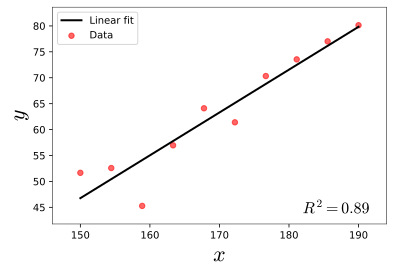

In [39]:
np.random.seed(10)

n = 10
x = np.linspace(150, 190, n)
y = 0.9 * x - 90 + 5 * np.random.randn(x.size)

a, r_squared = linear_regression(x, y)

### Example 2: Ideal Gas Law

The following data was gathered to determine the relationship between pressure and temperature of a fixed volume of 1kg of nitrogen. The volume is 10m<sup>3</sup>.

| T (°C) | p (N/m<sup>2</sup>)   |
|------|------|
|   -40  | 6900|
|  0  | 8100|
|  40  | 9300|
|   80  | 10500|
|   120  | 11700|
|   160  | 12900|

Employ the ideal gas law $pV=nRT$ to determine $R$ on the basis of this data. Note that for the law, $T$ must be expressed in K.

**Solution:**

$$ R = (\frac{p}{T})\frac{V}{n} $$

$$n = \frac{1kg}{28g/mol} $$

a_0 = 8100
a_1 = 30          

R^2 = 1.0000      

Relation equation: p = 8100.0 + 30.0 T
The experimental value of R is: 8.399999999999999


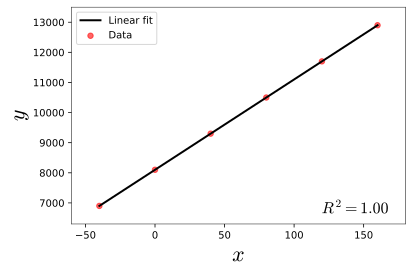

In [40]:
T = np.array([-40, 0, 40, 80, 120, 160]) #+ 273.15
p = np.array([6900, 8100, 9300, 10500, 11700, 12900]) 

a, r_squared = linear_regression(T, p)

print("Relation equation: p =", a[0], "+", a[1], "T")

R = a[1]*(10/(10**3/28))
print("The experimental value of R is:", R)

## Quadratic Least Squares Regression

This function fits data that follows a second-order or quadratic polynomial of the form:

$$
y = a_0 + a_1 x + a_2 x^2
$$


### Function

In [41]:
def quadratic_regression(x, y, with_plot=True, with_output=True):
    '''
    This function computes the coefficients a = [a_0, a_1, a_2] associated
    with the best quadratic fit to the data of the form y = a_0 + a_1*x + a_2*x^2.
    
    Returns:
    (a, r_squared)
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')
        
    n = len(x)
    s_x = sum(x)
    s_y = sum(y)
    s_xy = sum(x * y)
    s_x2y = sum(x**2 * y)
    s_x2 = sum(x**2)
    s_x3 = sum(x**3)
    s_x4 = sum(x**4)
    
    # fitting____________________
    # construct the matrix of coefficients [A]:
    A = np.array([
        [n, s_x, s_x2],
        [s_x, s_x2, s_x3],
        [s_x2, s_x3, s_x4]
    ])
    # construct the vector of contants [b]:
    b = np.array([
        [s_y],
        [s_xy],
        [s_x2y]
    ])
    
    # the unknowns a_0, a_1 and a_2 are solved for:
    
    a = GaussElimination(A, b)
    a = a.flatten() # this is done to get a vector instead of a matrix
    
    # compute R^2____________________
    s_r = sum((y - a[0] - a[1] * x - a[2] * x**2)**2)
    s_t = sum((y - np.mean(y))**2)
    r_squared = 1 - (s_r / s_t)
    
    # output____________________
    if with_output:
        print(f'''\ra_0 = {a[0]:.6g}
                  \ra_1 = {a[1]:.6g}
                  \ra_2 = {a[2]:.6g}\n
                  \rR^2 = {r_squared:.4f}\n''')
    
    # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = a[0] + a[1] * x_fit + a[2] * x_fit**2

        fig, ax = plt.subplots()
        
        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)
        
        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        # plot the linear fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Quadratic fit')

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        
        ax.legend()
        ax.text(0.95, 0.05, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
                horizontalalignment='right')
        
    return a, r_squared

### Example 1: Poly_Data

Fit a quadratic trend to the data in *poly_data.txt*

a_0 = 102.133
a_1 = 7.80686     
a_2 = -1.02769    

R^2 = 0.9360      



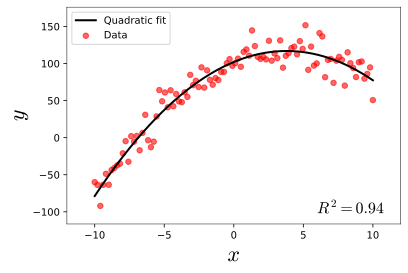

In [42]:
# Ensure that the cell defining the Gauss Elimination function (in section 2.1) has been run

import numpy as np

# read data
data = np.loadtxt('poly_data.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

a, r_squared = quadratic_regression(x, y)

## Polynomial Least Squares Regression

We can generalize the method of fitting a linear or a quadratic curve to higher-order polynomials. The function `polynomial_regression()` that takes the `order` of the fitted polynomial and gives back the corresponding coefficients of the best fit of that polynomial.

### Function

In [43]:
def polynomial_regression(x, y, order=1, with_plot=True, with_output=True):
    '''
    This function computes the coefficients of the best polynomial fit
    of the form y = a_0 + a_1*x + a_2*x^2 + a_3*x^3 + ... + a_n*x^n
    stored in the vector a.
    
    Returns:
    (a, r_squared)
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')

    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')

    n = len(x)

    if order > n - 1:
        raise ValueError('Order of polynomial too high for this number of data points.')

    sum_xp = np.zeros(2 * order + 1)
    for p in range(2 * order + 1):
        sum_xp[p] = sum(x**p)

    sum_yxp = np.zeros(order + 1)
    for p in range(order + 1):
        sum_yxp[p] = sum(y * x**p)

    # fitting____________________
    # construct the matrix of coefficients [A]:
    A = np.zeros((order + 1, order + 1))

    # construct the vector of contants [b]:
    b = np.zeros(order + 1)

    for k in range(order + 1):
        b[k] = sum_yxp[k]
        for l in range(order + 1):
            A[k, l] = sum_xp[k + l]

    # the unknowns coefficients are solved for:
    
    a = GaussElimination(A, b)
    a = a.flatten() # this is done to get a vector instead of a matrix

    # compute R^2____________________
    y_fit = np.zeros(len(x))
    for i in range(n):
            y_fit[i] = a[0]
            for j in range(1, order + 1):
                y_fit[i] = y_fit[i] + a[j] * x[i]**j
                
    s_r = sum((y - y_fit)**2)
    s_t = sum((y - np.mean(y))**2)
    r_squared = 1 - (s_r / s_t)

    # output____________________
    if with_output:
        for i in range(len(a)):
            print(f'a_{i} = {a[i]:.6g}')
            
        print(f'\nR^2 = {r_squared:.4f}\n')

    # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = np.zeros(1000)

        for i in range(len(x_fit)):
            y_fit[i] = a[0]
            for j in range(1, order + 1):
                y_fit[i] = y_fit[i] + a[j] * x_fit[i]**j

        fig, ax = plt.subplots()

        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)

        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        # plot the fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Polynomial fit')
        
        ax.set_title(f'Polynomial order = {order}',
                     fontname='Times New Roman',
                     fontsize=16)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.legend()
        ax.text(0.95, 0.05, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
            horizontalalignment='right')
        
    return a, r_squared

### Example 1: 5th Order Polynomial

Fit the data from the file *data_10.txt* to a 5<sup>th</sup> order polynomial. Take the first column of data as x, and the second column as y

a_0 = -0.191569
a_1 = -1.78686
a_2 = 1.26455
a_3 = 0.295168
a_4 = -0.0101995
a_5 = -0.00993192

R^2 = 0.9452



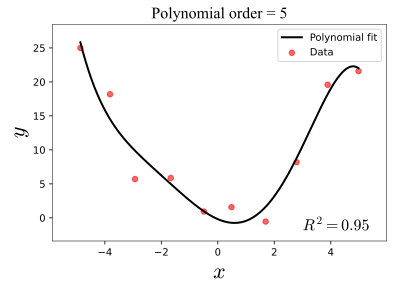

In [44]:
# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

a, r_squared = polynomial_regression(x, y, order=5, with_plot=True, with_output=True)

### Example 2: Cubic

Fit a cubic polynomial to the following data:

| x |  y  |
|------|------|
|  3  | 1.6|
|  4  | 3.6|
|  5  | 4.4|
|  7  | 3.4|
|  8  | 2.2|
|  9  | 2.8|
|  11  | 3.8|
|  12  | 4.6|

Along with the coefficients, determine r<sup>2</sup>.

a_0 = -11.4887
a_1 = 7.14382
a_2 = -1.04121
a_3 = 0.046676

R^2 = 0.8290



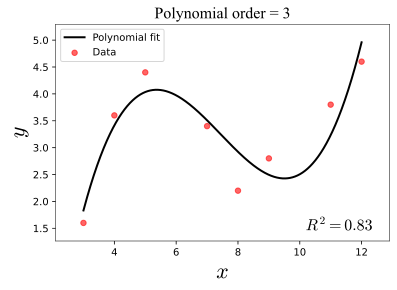

In [45]:
import numpy as np

x = np.array([3,4,5,7,8,9,11,12])
y = np.array([1.6,3.6,4.4,3.4,2.2,2.8,3.8,4.6])

a, r_squared = polynomial_regression(x, y, order=3, with_plot=True, with_output=True)

## Polynomial Regression with Numpy

The Numpy package provides the function `numpy.polyfit(x, y, deg)`, which fits a polynomial of degree `deg` to the dataset with `x` as input and `y` as output. This function returns an array which contains the coefficients of the polynomial.

With `numpy.polyfit(x, y, deg)` you don't need to compute function values manually. There is also a function `numpy.polyval(a, x)` that computes `y` values for coefficients `a` and values of `x`, which is useful for plotting.

### Example 1

Import the dataset which contains 10 samples from *data_10.txt*. Obtain the coefficients of the polynomial (`a`) with `np.polyfit(x, y, deg=3)`, then generate points to show a plot of the fit alongside the data using `np.polyval(a, x)`

Coefficients =  [-0.01764049  0.997901    0.11201032  0.56801471]


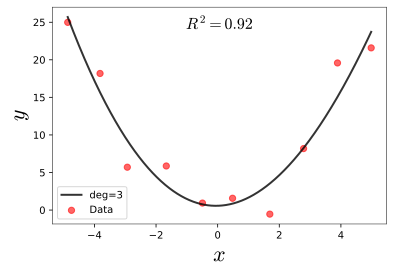

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

deg = 3
a = np.polyfit(x, y, deg=deg)
print('Coefficients = ', a)

x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = np.polyval(a, x_fit)

# compute R^2_______________________________
s_r = sum((y - np.polyval(a, x))**2)
s_t = sum((y - np.mean(y))**2)
r_squared = 1 - (s_r / s_t)

# plotting_______________________________
fig, ax = plt.subplots()
# plot data
ax.scatter(x, y, s=40, color='red', alpha=0.6, label='Data')
# plot fit
ax.plot(x_fit, y_fit, linewidth=2, color='black', alpha=0.8, label=f'deg={deg}')


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.text(0.5, 0.9, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
                horizontalalignment='center')
ax.legend()

## Generalized Least-Square Regression

Generalized least squares is used for curve fitting to linear combinations of functions of $ x $:

$$
y = a_0 z_0(x) + a_1 z_1(x) + a_2 z_2(x) + \cdots + a_n z_n
$$

where $ z_0, z_1, \cdots, z_n $ are $ n + 1 $ **basis functions**. In matrix notation, the above equation can be expressed as

$$
[y] = [Z] [a]
$$

As an example, if we take $ z_0(x) = 1, z_1(x) = x $ and $ z_2(x) = x^2 $, we can obtain the same results as we did with quadratic regression.


### Function

In [47]:
def Generalized_Least_Squares(x, y, functions, with_plot=True, with_output=True):
    '''
    This function computes the coefficients of the basis functions in
    the Generalized Least-Squares (GLS) regression method of the form
    y = a_0*z_0(x) + a_1*z_1(x)  + a_2*z_2(x) + ... + a_n*z_n(x)
    stored in the vector a.
    
    Returns:
    (a, r_squared)
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')

    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')
    
    n = len(x)
    
    Z = np.zeros((n, 0))
    
    for i in range(len(functions)):
        col = functions[i](x).reshape(-1, 1)
        Z = np.hstack((Z, col))
    
    # the unknowns coefficients are solved for:
    A = Z.T @ Z
    b = Z.T @ y.T
    
    a = GaussElimination(A, b)
    a = a.flatten() # this is done to get a vector instead of a matrix

    # compute R^2____________________
    y_fit = np.zeros(len(x))
    for i in range(len(x)):
            for j in range(len(functions)):
                y_fit[i] = y_fit[i] + a[j] * functions[j](x[i])
                
    s_r = sum((y - y_fit)**2)
    s_t = sum((y - np.mean(y))**2)
    r_squared = 1 - (s_r / s_t)

    # output____________________
    if with_output:
        for i in range(len(a)):
            print(f'a_{i} = {a[i]:.6g}')
            
        print(f'\nR^2 = {r_squared:.4f}\n')

    # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = np.zeros(1000)

        for i in range(len(x_fit)):
            for j in range(len(functions)):
                y_fit[i] = y_fit[i] + a[j] * functions[j](x_fit[i])

        fig, ax = plt.subplots()

        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)

        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        # plot the fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='GLS fit')
        
        ax.set_title(f'Generalized Least Squares (GLS) regression',
                     fontname='Times New Roman',
                     fontsize=14)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.legend()
        ax.text(0.95, 0.05, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
            horizontalalignment='right')
        
    return a, r_squared

### Example 1

Import the dataset which contains 10 samples from *data_10.txt*. We know this data follows a third order polynomial. Define the basis functions to fit to a third order polynomial and print the coefficients. Compare the results to those obtained in Example 1 of Polynomial Least Squares Regression.

a_0 = 0.568015
a_1 = 0.11201
a_2 = 0.997901
a_3 = -0.0176405

R^2 = 0.9161



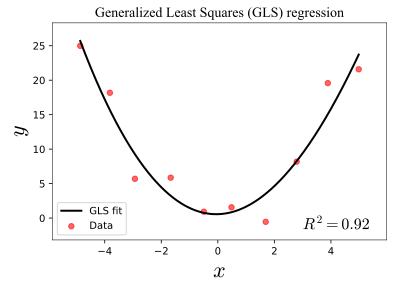

In [48]:
# Ensure the function for Gauss Elimination has been defined

# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

# we need to define a constant value function with const * x**0 to make a vector, not a scalar
def z0(x): return x**0 
def z1(x): return x
def z2(x): return x**2
def z3(x): return x**3

func_list = [z0, z1, z2, z3]

a, r_squared = Generalized_Least_Squares(x, y, func_list, with_plot=True, with_output=True)

### Example 2: Exponential Decay

Three disease-carrying organisms decay exponentially in seawater according to the following model:

$$
p(t) = Ae^{-1.5t}+Be^{-0.3t}+Ce^{-0.5t}
$$

Estimate the initial concentration of each organism (A, B, and C) given the following measurements.

| t |  p(t)  |
|------|------|
|  0.5  |  7 |
|  1  | 5.2 |
|  2  | 3.8 |
|  3  | 3.2 |
|  4  | 2.5 |
|  5  | 2.1 |
|  6  | 1.8 |
|  7  | 1.5 |
|  8  | 1.2 |
|  9  | 1.1 |


a_0 = 3.77779
a_1 = 4.38724
a_2 = 1.37754

R^2 = 0.9965



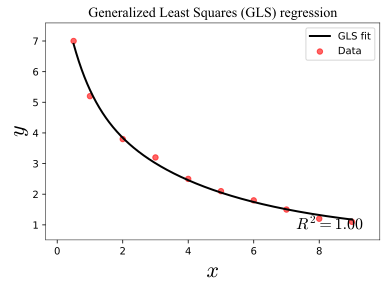

In [49]:
# Ensure the function for Gauss Elimination has been defined

import numpy as np

t = np.array([0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9])
p = np.array([7, 5.2, 3.8, 3.2, 2.5, 2.1, 1.8, 1.5, 1.2, 1.1])

# we need to define a constant value function with const * x**0 to make a vector, not a scalar
def z0(x): return np.exp(-1.5*x)
def z1(x): return np.exp(-0.3*x)
def z2(x): return np.exp(-0.05*x)

func_list = [z0, z1, z2]

a, r_squared = Generalized_Least_Squares(t, p, func_list, with_plot=True, with_output=True)

## Nonlinear Regression

The above methods of least squares will not work on nonlinear data.

There are some situations where we can easily transform the data so that the resulting dataset is linear in terms of the coefficients. In this case, we can use all the linear techniques we learned before, and then transform back to the original data and coefficients.

For the example of data in the form of a Gaussian distribution:

\begin{align}
y & = a_0 e^{a_1 x^2}\\
\ln{y} & = \ln{\left(a_0 e^{a_1 x^2}\right)}\\
\ln{y} & = \ln{a_0} + a_1 x^2
\end{align}

If we do the following transformation of data and change of variables, we can immediately see that we arrive at linear relations in terms of the new coefficients:

* Transform the data first:
\begin{align}
X & = x^2\\
Y & = \ln{y}
\end{align}
* Fit a linear function of the form
\begin{align}
Y & = A_0 + A_1 X
\end{align}
to the data (basically find $ A_0 $ and $ A_1 $ for the best linear fit).
* Revert back to original coefficients using the following relations:
\begin{align}
\\A_0 & = \ln{a_0} \: \rightarrow \: a_0 = e^{A_0}\\
A_1 & = a_1
\end{align}

### Example 1

Load the data from *nonlinear_data.txt*, transform the data, and use `linear_regression()` to find the coefficients of the transformed data. Transform the coefficients from `linear_regression()` to coefficients for the original function. Compute the value of $R^2$ for the original data.

> Note that the $ R^2 $ value from the `linear_regression()` function belongs to the transformed data, not the original data. Therefore, compute $ R^2 $ for the original data separately.

a_0 = 19.52
a_1 = -0.9787


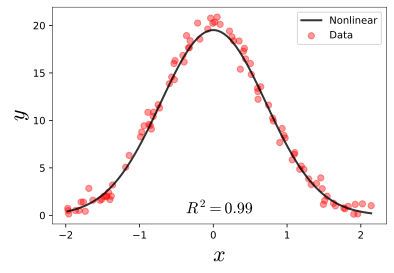

In [50]:
import matplotlib.pyplot as plt
# read data
data = np.loadtxt('nonlinear_data.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

# transforming data_______________________________
X = x**2
Y = np.log(y)

A, _ = linear_regression(X, Y, with_plot=False, with_output=False)

# converting back to original coefficients_______________________________
a_0 = np.exp(A[0])
a_1 = A[1]

print(f'a_0 = {a_0:.4g}\na_1 = {a_1:.4g}')

x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = a_0 * np.exp(a_1 * x_fit**2)


# compute R^2
s_r = sum((y - a_0 * np.exp(a_1 * x**2))**2)
s_t = sum((y - np.mean(y))**2)
r_squared = 1 - (s_r / s_t)

# plotting_______________________________
fig, ax = plt.subplots()
# plot data
ax.scatter(x, y, s=40, color='red', alpha=0.4, label='Data')
# plot fit
ax.plot(x_fit, y_fit, linewidth=2, color='black', alpha=0.8, label='Nonlinear')


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.text(0.5, 0.05, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
                horizontalalignment='center')
ax.legend()

## Non-linear Regression with `scipy.optimize.curve_fit()`

For a situation that we cannot use transformation of the data for fitting a non-linear model, we can use the `scipy.optimize.curve_fit()` to fit any general function $ f(x) $ that we desire.

### Example 1

Import the data from *nonlinear_data.txt* and use `scipy.optimize.curve_fit()` to fit to the function $ y = a_0 e^{a_1 x^2} $, since we know the data follows that form.

[20.07642993 -0.99121504]


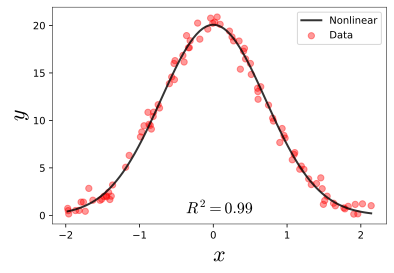

In [51]:
# read data
data = np.loadtxt('nonlinear_data.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

from scipy.optimize import curve_fit

# defining model function _______________________________
def f(x, a0, a1): return  a0 * np.exp(a1 * x**2)

# finding the coefficients with least-squares fit
opt, _ = curve_fit(f, x, y)
print(opt)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit= f(x_fit, *opt)

# plotting _______________________________
fig, ax = plt.subplots()
# plot data
ax.scatter(x, y, s=40, color='red', alpha=0.4, label='Data')
# plot fit
ax.plot(x_fit, y_fit, linewidth=2, color='black', alpha=0.8, label='Nonlinear')


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.text(0.5, 0.05, f'$R^2 = {r_squared:.2f}$',
                transform=ax.transAxes,
                fontsize=16,
                horizontalalignment='center')
ax.legend()

### Example 2: Reaction Data

Enzymatic reactions are used extensively to characterize biologically mediated reactions. The following is an example of a model that is used to fit such reactions:

$$
v_0 = \frac{k_m[S]^3}{K+[S]^3}
$$

where $v_0$ = the initial rate of the reaction (M/s). $[S]^3$ = the substrate concentration (M), and $k_m$ and $K$ are parameters. The following data can be fit with this model:

| [S], M |  v<sub>0</sub>, M/s  |
|------|------|
|  0.01  |  6.078 x 10<sup>-11</sup> |
|  0.05  | 7.595 x 10<sup>-9</sup> |
|  0.1  | 6.036 x 10<sup>-8</sup> |
|  0.5  | 5.788 x 10<sup>-6</sup> |
|  1  | 1.737 x 10<sup>-5</sup> |
|  5  | 2.423 x 10<sup>-5</sup> |
|  10  | 2.430 x 10<sup>-5</sup> |
|  50  | 2.431 x 10<sup>-5</sup> |
|  100  | 2.431 x 10<sup>-5</sup> |

Use a transformation to linearize the model and evaluate the parameters. Display the data and the model fit on a graph.

**Solution:**  

The model can be linearized by inverting it

$$
\frac{1}{v_0} = \frac{K}{k_m}\frac{1}{[S]^3}+\frac{1}{k_m}
$$

[2.43096243e-05 3.99732445e-01]


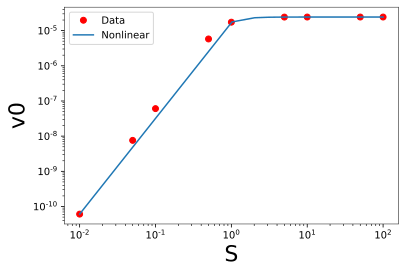

In [52]:
import matplotlib.pyplot as plt

S = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]) 
v0 = np.array([6.078e-11, 7.595e-9, 6.063e-8, 5.788e-6, 1.737e-5, 2.423e-5, 2.43e-5, 2.431e-5, 2.431e-5]) 

from scipy.optimize import curve_fit

# defining model function _______________________________
def f(S, km, K): return  (km*S**3)/(K+S**3)

# finding the coefficients with least-squares fit
opt, _ = curve_fit(f, S, v0)
print(opt)
S_fit = np.linspace(S.min(), S.max(), 100)
v0_fit= f(S_fit, *opt)

# plotting_______________________________
fig, ax = plt.subplots()
# plot data
ax.loglog(S, v0, 'ro', label='Data')
# plot fit
ax.loglog(S_fit, v0_fit, label='Nonlinear')

ax.set_xlabel('S')
ax.set_ylabel('v0')

ax.legend()

# Interpolation & Splines

* Lagrange Interpolation will create a continuous function that passes through every point in the data set, but the polynomial function tends to be high order. 
* Splines are a series of distinct, generally low order polynomials connecting the points in a data set


> Ensure you **visualize** the function(s) to understand which method is best suited to the data

## Lagrange Interpolation

This form of interpolation constructs a Lagrange interpolation polynomial, and determines the value of the function at a given point.

### Function

In [53]:
def LagrangeInterpolationPolynomial( x, y, xx, with_plot=False ):
    
    '''
    This function constructs the Lagrange interpolation polynomial 
    and computes its value at xx denoted yy.
    
    Returns:
    (yy)
    '''   
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')

    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')

    n = len(x)
    
    # Compute the value of the interpolation polynomial at xx_____________
    yy = 0
    for i in range(0,n):
        prod = 1.;
        # Loop over the n data points but exclude data point i
        for j in range(0,n):
            if j != i :
                prod = prod * ( xx - x[j] ) / ( x[i] - x[j] ) 
        yy = yy + prod * y[i];

    # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = np.zeros(1000)

        for k in range(len(x_fit)):
            for i in range(0,n):
                prod = 1.;
                # Loop over the n data points but exclude data point i
                for j in range(0,n):
                    if j != i :
                        prod = prod * ( x_fit[k] - x[j] ) / ( x[i] - x[j] ) 
                y_fit[k] = y_fit[k] + prod * y[i];

        fig, ax = plt.subplots()

        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)

        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        ax.scatter(xx, yy, s=30, color='blue', label='interpolated value', alpha=0.6)
        # plot the fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Lagrange')
        
        ax.set_title(f'Lagrange interpolation polynomial',
                     fontname='Times New Roman',
                     fontsize=14)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.legend()       
        
    return yy

### Example 1

Import the data from *data_10.txt* and use Lagrange Interpolation to determine the value of the function at $ x = -2.4 $

Value of Lagrange interpolation polynomial at x = -2.400000 is 7.095071


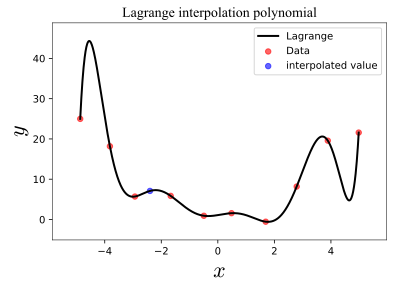

In [54]:
import numpy as np
# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

xx = -2.4
yy = LagrangeInterpolationPolynomial( x, y, xx, with_plot=True )
print(f'Value of Lagrange interpolation polynomial at x = {xx:.6f} is {yy:.6f}')

### Example 2

The following data are measured precisely:

|  T   |  Z   |
|------|------|
|  2   |  6   |
|  2.1 |  7.752 |
|  2.2 |  10.256 |
|  2.7 |  36.576 |
|  3   |  66  |
|  3.4 |  125.168 |

Use  a  third-order  Lagrange  interpolating  polynomial  to  determine $z$ at $t$= 2.5

Value of Lagrange interpolation polynomial at t = 2.500000 is 23.000000


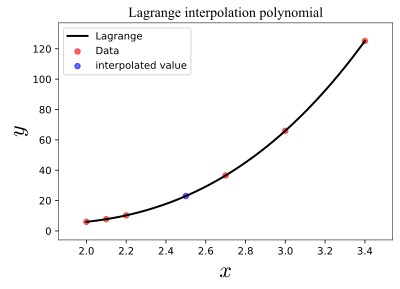

In [55]:
import numpy as np

T = np.array([2, 2.1, 2.2, 2.7, 3, 3.4])
Z = np.array([6, 7.752, 10.256, 36.576, 66, 125.168])

t = 2.5
z = LagrangeInterpolationPolynomial( T, Z, t, with_plot=True )
print(f'Value of Lagrange interpolation polynomial at t = {t:.6f} is {z:.6f}')

## Linear Splines

Splines are a good compromise between regression and interpolation. They are constructed to pass through all data points while being low order polynomials. In each interval $ i $ between two data points $x_i$ and $x_{i+1}$, the fit is described by a polynomial $s_i(x)$ of a given order. 

Linear splines assume that the $s_i(x)$ are polynomials of order one. If we impose the continuity of the fit at each data point $x_i$, linear splines are obtained by simply joining 2 consecutives data points by a line, and the value $y(x)$ of the linear spline fit at any point $x$ within the range of the data is given by linear interpolation.

### Interval Finder

Once all coefficients of all $s_i(x)$ are determined, we need to know in which interval $[x_i,x_{i+1}]$ a new data point point $x$ to return the value of the spline fit at $x$. This function below is needed for splines.

In [56]:
def interval_finder( x, xx ):
    
    '''
    This function returns the lower bound index ii of the interval
    [x_ii,x_{ii+1}] in which xx lies
    
    Returns:
    (ii)
    '''  
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')
        
    if xx < x[0] or xx > x[-1]:
        raise ValueError('Value is outside data set.')

    n = len(x)  
    
    # Initialization____________________
    iL = 0
    iU = n-1

    # Search___________________ 
    while (1):
        if iU - iL <= 1:
            break 
        iM = round( ( iU + iL ) / 2. );
        if x[iM] > xx:
            iU = iM
        else:
            iL = iM

    return iL

### Interval Finder Example

Load data from *data_10.txt* and find the interval of points in which the $ x $ value of 2.4 resides.

In [57]:
# Remember Python indexing starts at zero!

# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

xx = 2.4
ii = interval_finder( x, xx )
print(f'Value {xx:.6f} is in interval [',ii,',',ii+1,']')

Value 2.400000 is in interval [ 6 , 7 ]


### Function

In [58]:
def linear_spline( x, y, xx, with_plot=False ):

    '''
    This function constructs a linear spline fit  
    and computes its value at xx denoted yy.
    
    Returns:
    (yy)
    '''   
        
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')

    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')
        
    if xx < x[0] or xx > x[-1]:
        raise ValueError('Value is outside data set.')        

    n = len(x)
    
    # compute interpolated value_____________________
    ii = interval_finder( x, xx )
    yy = (( y[ii+1] - y[ii] ) / ( x[ii+1] - x[ii] )) * ( xx - x[ii] ) + y[ii]

        # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = np.zeros(1000)

        for k in range(len(x_fit)):
            ii = interval_finder( x, x_fit[k] )
            y_fit[k] = (( y[ii+1] - y[ii] ) / ( x[ii+1] - x[ii] )) * ( x_fit[k] - x[ii] ) + y[ii]
            
        fig, ax = plt.subplots()

        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)

        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        ax.scatter(xx, yy, s=30, color='blue', label='interpolated value', alpha=0.6)
        # plot the fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Linear spline')
        
        ax.set_title(f'Linear spline',
                     fontname='Times New Roman',
                     fontsize=14)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.legend()
        
    return yy

### Example 1

Load the data from *data_10.txt*. Determine the value of $ y $ at $ x = 3.4 $ using linear splines.

Value of linear spline at x = 3.400000 is 14.513106


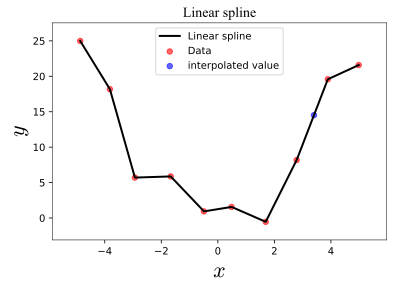

In [59]:
# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

xx = 3.4
yy = linear_spline( x, y, xx, with_plot=True )
print(f'Value of linear spline at x = {xx:.6f} is {yy:.6f}')

## Quadratic Splines

Quadratic splines assume that the $s_i(x)$ are polynomials of order two.

Note that the quadratic spline fit available through the interpolate function of the scipy package uses a different construction of quadratic splines than the function defined below.

### Function

In [60]:
def quadratic_spline( x, y, xx, with_plot=False ):

    '''
    This function constructs a quadratic spline fit  
    and computes its value at xx denoted yy.
    
    Returns:
    (yy)
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')

    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')
        
    if xx < x[0] or xx > x[-1]:
        raise ValueError('Value is outside data set.')        

    n = len(x)
    
    # compute the coefficient b and c__________________
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    h = np.zeros(n-1)
    for i in range(0,n-1):
        h[i] = x[i+1] - x[i]
        
    # Initialization i=0
    c[0] = 0.
    b[0] = ( y[1] - y[0] ) / h[0]
    b[1] = b[0]

    # The coefficients b, i=2,...,n-2
    for i in range(1,n-2):
        b[i+1] = 2. * ( y[i+1] - y[i] ) / h[i] - b[i]

    # The coefficients c, i=1,...,n-2
    for i in range(1,n-1):
        c[i] = ( y[i+1] - y[i] ) / h[i]**2 - b[i] / h[i];      
    
    # compute interpolated value_____________________
    ii = interval_finder( x, xx )
    yy = y[ii] + b[ii] * ( xx - x[ii] ) + c[ii] * ( xx - x[ii] )**2

        # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = np.zeros(1000)

        for k in range(len(x_fit)):
            ii = interval_finder( x, x_fit[k] )
            y_fit[k] = y[ii] + b[ii] * ( x_fit[k] - x[ii] ) + c[ii] * ( x_fit[k] - x[ii] )**2
            
        fig, ax = plt.subplots()

        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)

        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        ax.scatter(xx, yy, s=30, color='blue', label='interpolated value', alpha=0.6)
        # plot the fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Lagrange')
        
        ax.set_title(f'Quadratic spline',
                     fontname='Times New Roman',
                     fontsize=14)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.legend()
        
    return yy

### Example 1 

Load the data from *data_10.txt*. Using a quadratic spline, what is the value of $ y $ at $x = 3.4$ ?

Value of linear spline at x = 3.400000 is 25.589755


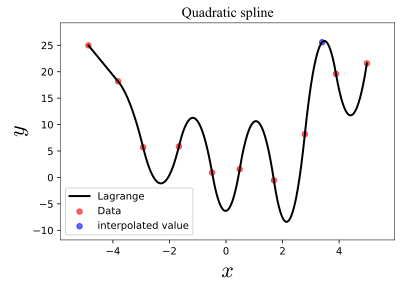

In [61]:
# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

xx = 3.4
yy = quadratic_spline( x, y, xx, with_plot=True )
print(f'Value of linear spline at x = {xx:.6f} is {yy:.6f}')

## Cubic Splines Using Python Scipy

Cubic splines assume that the $s_i(x)$ are polynomials of order three. Instead of defining a new algorithm, the below uses Scipy's interpolation function.

### Function

In [62]:
def scipy_interpolation( x, y, xx, kind='cubic', with_plot=False ):

    '''
    This function uses the scipy function interpolation as a fit 
    and computes its value at xx denoted yy.
    When kind is set to 'cubic', this function corredponds to cubic splines.
    
    Returns:
    (yy)
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import interpolate
    
    # preliminary check____________________
    if len(x) != len(y):
        raise ValueError('Size of vectors x and y should be equal.')

    if len(x) == 1:
        raise ValueError('Provide at least 2 data points.')
        
    if xx < x[0] or xx > x[-1]:
        raise ValueError('Value is outside data set.')        

    n = len(x)
    
    # Interpolation with scipy
    f = interpolate.interp1d( x, y, kind )
    yy = f(xx)

    # plotting____________________
    if with_plot:
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = np.zeros(1000)

        for k in range(len(x_fit)):
            y_fit[k] = f(x_fit[k])
            
        fig, ax = plt.subplots()

        # make plot area larger to see things more clearly
        factor = 0.1
        dx = max(np.hstack((x_fit, x))) - min(np.hstack((x_fit, x)))
        x_l = min(np.hstack((x_fit, x))) - factor * dx
        x_u = max(np.hstack((x_fit, x))) + factor * dx

        dy = max(np.hstack((y_fit, y))) - min(np.hstack((y_fit, y)))
        y_l = min(np.hstack((y_fit, y))) - factor * dy
        y_u = max(np.hstack((y_fit, y))) + factor * dy

        ax.set_xlim(x_l, x_u)
        ax.set_ylim(y_l, y_u)

        # plot the data
        ax.scatter(x, y, s=30, color='red', label='Data', alpha=0.6)
        ax.scatter(xx, yy, s=30, color='blue', label='interpolated value', alpha=0.6)
        # plot the fit
        ax.plot(x_fit, y_fit, '-', color='black', linewidth=2, label='Lagrange')
        
        if kind == 'cubic':
            ax.set_title(f'Cubic spline',
                     fontname='Times New Roman',
                     fontsize=14)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.legend()
        
    return yy

### Example 1

Load the data from *data_10.txt*. Using a quadratic spline, what is the value of $ y $ at $ x = 3.4 $ ?

Value of cubic spline at x = 3.400000 is 15.011130


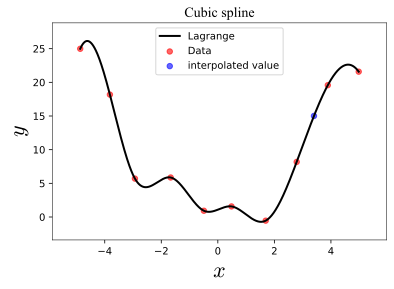

In [63]:
# read data
data = np.loadtxt('data_10.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

xx = 3.4
yy = scipy_interpolation( x, y, xx, kind='cubic', with_plot=True )
print(f'Value of cubic spline at x = {xx:.6f} is {yy:.6f}')

### Example 2

Fit a cubic spline to the following data to determine $y$ at $x$ = 1.5

|  x   |  y   |
|------|------|
|  0   |  20  |
|  2   |  20  |
|  4   |  12  |
|  7   |  7   |
|  10  |  6   |
|  12  |  6   |

Value of cubic spline at x = 1.500000 is 21.334353


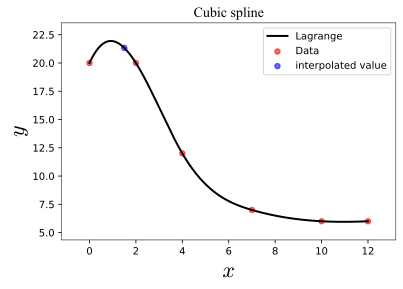

In [64]:

x = np.array([0, 2, 4, 7, 10, 12])
y = np.array([20, 20, 12, 7, 6, 6])

xx = 1.5
yy = scipy_interpolation( x, y, xx, kind='cubic', with_plot=True )
print(f'Value of cubic spline at x = {xx:.6f} is {yy:.6f}')

# Numerical Integration & Differentiation

## Differentiation

This function computes derivatives using three different methods that can be selected: central, forward, and backward. The default method is central, and the default step size is 0.001.

### Function

In [65]:
def derivative(f, x_0, method='central', delta_x=0.001):
    '''
    This function computes the derivative of function f.
    
    Returns:
    (The value of the derivative)
    '''
    if method == 'central':
        df_dx = (f(x_0 + delta_x) - f(x_0 - delta_x)) / (2 * delta_x)
    elif method == 'forward':
        df_dx = (f(x_0 + delta_x) - f(x_0)) / delta_x
    elif method == 'backward':
        df_dx = (f(x_0) - f(x_0 - delta_x)) / delta_x
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")
    return df_dx

### Example 1

<a id='deriv_example'></a>
Suppose that we want to compute the derivative of $ f(x) = e^x \cos{x} $ at $ x_0 = 0.5 $:

$$
\frac{df}{dx}\Bigr|_{x_0=0.5} = f'(0.5) = e^{(0.5)} \cos{(0.5)} + e^{(0.5)}(-\sin{(0.5)}) = 0.65644995
$$

Here, we analytically obtained the derivative function, and then substituted $ x_0 = 0.5$.

Use the `derivative()` function defined above to determine the approximate derivative of the function at $ x = 0.5 $ with the central method and a step size of 0.01. Try different methods and step sizes to see how this affects the returned value compared to the analytical value.

In [66]:
import numpy as np

def f(x): return np.exp(x) * np.cos(x)

df_dx = derivative(f, 0.5, method='central', delta_x=0.01)
print(f'df/dx = {df_dx:.10g}')

df/dx = 0.6563753755


## Differentiation with Numpy

When we have a bunch of $ y $ values and we want to compute the derivative of the $ y $ at every point, we can easily use the `np.gradient(y, step_size, edge_order=1)` function from the Numpy package. This function uses central differencing for the interior points, and by default uses forward or backward differencing at the boundaries (we can have **second order differencing** ($ O({\Delta x}^2) $) at the boundaries as well by specifying `edge_order=2`). The step size is 1 by default, but you can easily change this.

### Example 1

Compute the derivatives of $ f(x) = e^x \cos{x} $ at $ x_0 \in \{0.4, 0.5, 0.6\} $. First compute $ y=f(x) $ at those points, then use `np.gradient()`

This is the same function used [here](#deriv_example). Compare the results for $ x = 0.5 $

In [67]:
def f(x): return np.exp(x) * np.cos(x)

x_0 = np.array([0.4, 0.5, 0.6])
y = f(x_0) # numpy functions are automatically vectorized

np.gradient(y, 0.1)

array([0.72827498, 0.64899001, 0.56970504])

### Example 2

The velocity (m/s) of an object at time $t$ seconds is given by:

$$
v = \frac{2t}{\sqrt{1+t^2}}
$$
Find the acceleration of the particle at time $t$ = 5 s using step sizes of 0.5 and 0.25. Employ the exact solution to compute the true percent relative error of each estimate. 
> Think: How should the step size affect the error?

In [68]:
import numpy as np

def f(x): return (2*x)/(np.sqrt(1+x**2))

#step of 0.5
x1 = np.array([4.5, 5, 5.5])
y1 = f(x1) # numpy functions are automatically vectorized

#step of 0.25
x2 = np.array([4.75, 5, 5.25])
y2 = f(x2)

d1 = np.gradient(y1, 0.5)
d2 = np.gradient(y2, 0.25)

#numerical solution
ans = (2)/(5**2+1)**(3/2)

#errors
err1 = 100*(ans-d1[1])/ans
err2 = 100*(ans-d2[1])/ans
print(f'Percent error with step size 0.5 is {err1:.3f}%')
print(f'Percent error with step size 0.25 is {err2:.3f}%')

Percent error with step size 0.5 is -1.855%
Percent error with step size 0.25 is -0.459%


## Integration

This function computes integrals using different methods that can be selected: midpoint, trapezoidal, Simpson's 1/3 and 3/8 rules. The default method is trapezoidal. 

### Function

In [69]:
def integrate(f, a, b, n, method='trapz'):
    '''
    This function integrates y=f(x) with the midpoint, trapezoidal, Simpson's 1/3 and 3/8 rules.
    
    Inputs:
    f: function to be integrated.
    a: lower limit of integration
    b: upper limit of integration
    n: number of sub-intervals
    method: 'midpoint', 'trapz', 'simp_1/3', 'simp_3/8'
    
    Returns:
    I: the computed value of the integral.
    '''
    
    import numpy as np
    
    if n < 1:
        raise ValueError('You must have at least one interval.')
    
    # 1d array of x positions: n sub-intervals => n+1 points
    x = np.linspace(a, b, n+1)
    
    # Sub-interval length
    delta_x = (b - a) / n
    
    # Values of f at points x
    y = f(x)
    
    if method == 'midpoint':    # _______________________
        I = 0
        for i in range(n):
            mid = (x[i+1] + x[i]) / 2
            I += f(mid) * delta_x
    
    elif method == 'trapz':    # _______________________
        I = 0
        for i in range(n):
            I += ((y[i] + y[i+1]) / 2) * delta_x
    
    elif method == 'simp_1/3':    # _______________________
        if n % 2 != 0:
            raise ValueError('n must be an even number for Simpson\'s 1/3 rule.')
            
        I = 0
        for i in range(0, n, 2):
            I += ((y[i] + 4 * y[i+1] + y[i+2]) / 3) * delta_x
            
    elif method == 'simp_3/8':    # _______________________
        if n % 3 != 0:
            raise ValueError('n must be a multiple of 3 for Simpson\'s 3/8 rule.')
            
        I = 0
        for i in range(0, n-1, 3):
            I += (y[i] + 3 * y[i+1] + 3 * y[i+2] + y[i+3]) * (3 / 8) * delta_x
    else:    # _______________________
        raise Exception('Available integration methods are midpoint, trapz, simp_1/3 and sim_3/8.')
    
    return I

### Example 1

Calculate the integral of $ x^4 $ over the interval $ [0,3] $ using Simpson's 3/8 rule and 6 sub-intervals.

The true value of this integral between 0 and 3 is 48.6. Try different methods and number of sub-intervals to see how this affects accuracy.

In [70]:
# function
def f(x): return x ** 4 

# the integration interval
a, b = 0, 3

# number of sub-intervals
n = 6

Integral = integrate(f, a, b, n, method='simp_3/8')
print("The value of the integral:", Integral)

The value of the integral: 48.65625


### Example 2

The amount of mass transported via a pipe over a period of time can be computed as:

$$
M = \int_{t_1}^{t_2} Q(t)c(t)dt
$$

where $M$ = mass (mg), $t_1$ = the initial time (min), $t_2$ = the final time (min), $Q(t)$ = flow rate (m3/min), and $c(t)$ = concentration (mg/m<sup>3</sup>). The following functional representations define the temporal variations in flow and concentration:

$$
\begin{align}
Q(t) = 9 + 5cos^2(0.4t)\\
c(t) = 5e^{-0.5t} + 2e^{0.15t}
\end{align}
$$

Determine the mass transported between $t_1$ = 2 and $t_2$ = 8 min with Simpson's 3/8 method and 12 sub-intervals.

In [71]:
# function
def f(t): return (9+5*(np.cos(0.4*t))**2)*(5*np.exp(-0.5*t)+2*np.exp(0.15*t))

# the integration interval
a, b = 2, 8

# number of sub-intervals
n = 12

Integral = integrate(f, a, b, n, method='simp_3/8')
print("The amount of mass transported is: %.4f mg" % Integral)

The amount of mass transported is: 335.9596 mg


## Romberg Method



The Romberg method is an extremely powerful method that is able to yield an almost exact approximation of an integral (at least up to machine precision) for the computing cost of a few trapezoidal approximations. 

### Function

In [72]:
def romberg(f, a, b, tol=1e-10, maxit=20):
    '''
    This function integrates y=f(x) with the Romberg method.
    
    Inputs:
    f: function to be integrated.
    a: lower limit of integration
    b: upper limit of integration
    tol: required tolerance
    maxit: maximum number of iterations
    
    Returns:
    I: the computed value of the integral.
    '''
    
    import numpy as np
    
    # The Romberg matrix
    I = np.zeros((maxit,maxit))
    
    # Initialization
    n = 1
    I[0,0] = integrate(f, a, b, n, method='trapz')
    iter = 0
    
    # Loop until convergence or maxit is attained
    while ( iter < maxit ):
        iter += 1
   
        # Divide h by 2 at each iteration
        n = 2**iter
        
        # Compute an approximation with trapezoidal rule with h = ( b - a ) / 2^iter
        I[iter,0] = integrate(f, a, b, n, method='trapz')
   
        # Compute the improved estimates at each level
        for k in range(1,iter+1):
            j = iter - k;
            I[j,k] = ( 4**k * I[j+1,k-1] - I[j,k-1] ) / ( 4**k - 1 )
   
        # Compute relative error and check convergence
        ea = np.abs( ( I[0,iter] - I[1,iter-1] ) / I[0,iter] )
        if ea < tol: break
    
    integral = I[0,iter]
    niter = iter
    
    return( integral, niter, ea )

### Example 1

Use the Romberg method to determine the following integral:

$$
\int_1^2 \cos(x)dx = \sin(2) - \sin(1)
$$

Compute the exact integral using the anti-derivative. Compare the Romberg and the exact value by calculating the actual relative error.

In [73]:
# function
f = lambda x: np.cos(x)

# anti-derivatie of f
F = lambda x: np.sin(x) 

# the integration interval
a, b = 1, 2

# computing the true value of the integral
I_true = F(b) - F(a)

# Romberg approximation
( I_rom, niter, ea ) = romberg(f, a, b, tol=1e-8, maxit=20)

print(f'Exact value = {I_true:.12e}')
print(f'Romberg approximation = {I_rom:.12e} in {niter} iterations with an approximate error of {ea:.5e}')
erel = np.abs( ( I_rom - I_true ) / I_true )
print(f'The actual relative error is {erel:.4e}')


Exact value = 6.782644201779e-02
Romberg approximation = 6.782644203195e-02 in 3 iterations with an approximate error of 8.34890e-09
The actual relative error is 2.0879e-10


### Example 2

Use Romberg integration to evaluate

$$
\int_{0}^{2}\frac{e^xsinx}{1+x^2}dx
$$

with a tolerance of 0.5%. 

In [74]:
import numpy as np

# function
f = lambda x: (np.exp(x)*np.sin(x))/(1+x**2)

# the integration interval
a, b = 0, 2

# Romberg approximation
( I_rom, niter, ea ) = romberg(f, a, b, tol=5e-3, maxit=20)

print(f'Integral = {I_rom:.6f}')

Integral = 1.941836


# Ordinary Differential Equations

## Euler's Method

A first-order numerical method for solving initial-value ODEs.

### Function

In [75]:
def euler_ode(dy_dt, t, y0, with_plot=False):
    '''
    This function solves a first-order ODE of the type dy/dy = f(t, y) over a specified time-span.
    
    Returns:
    y = Numerical solution vector of the ODE
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # step size
    h = t[1] - t[0]
    
    y = np.zeros(t.size)

    # setting initial condition
    y[0] = y0

    # solving in time _______________________________
    for i in range(0, t.size - 1):
        y[i+1] = y[i] + dy_dt(t[i], y[i]) * h
    
    # plotting _______________________________
    if with_plot:
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.plot(t, y, linewidth=3, marker='o', markerfacecolor='none', color='black')
        
        ax.set_title('Euler\'s Method')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.grid(linewidth=0.5, alpha=0.25)
        
    return y

### Example 1

<a id='Euler_Ex1'></a>
We would like to solve the following 1st order ODE problem:

$$
\frac{dy}{dt} = 4e^{0.8t} - 0.5 y\quad,\quad 0 < t \leqslant 4\quad,\quad y(0) = 2
$$

The analytical solution this ODE is:

$$ y
= \frac{4}{1.3} \left( e^{0.8t} - e^{-0.5t} \right) + 2 e^{-0.5t} 
$$

> Using the Euler's method, find the solution with step size of $ h = 1 $

[ 2.          5.         11.40216371 25.51321155 56.8493113 ]


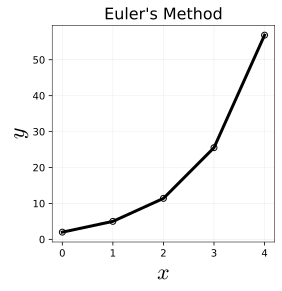

In [76]:
import numpy as np
# defining the Right-Hand Side (RHS) of the ODE
dy_dt = lambda t, y: 4 * np.exp(0.8 * t) - 0.5 * y

# generating the t vector
h = 1
t = np.arange(0, 5, h)

# setting initial condition
y0 = 2

y = euler_ode(dy_dt, t, y0, with_plot=True)
print(y)

### Example 2

Solve  the  following  problem  over  the  interval  from $x$ = 0 to 1 using a step size of 0.25 where $y(0)$ = 1. Display all your results on the same graph.

$$
\frac{dy}{dx} = (1+2x)\sqrt{y}
$$

Solve it analytically, and using Euler's method.

**Solution:**  
Analytical solution is:

$$
y = (\frac{x+x^2+2}{2})^2
$$

> How can you explain the difference between Euler's method and the analytical solution? Try the example again with a step size of 0.1

[1.         1.25       1.66926275 2.3152625 ]
[1.         1.33691406 1.890625   2.74316406]


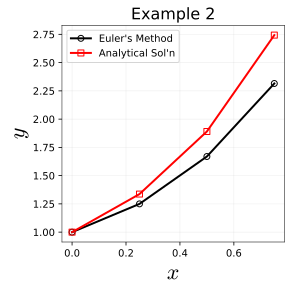

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# defining the Right-Hand Side (RHS) of the ODE
def dy_dx(x,y): return (1+2*x)*np.sqrt(y)

def analytical(x): return ((x+x**2+2)/(2))**2

# generating the t vector
h = 0.25
x = np.arange(0, 1, h)

# setting initial condition
y0 = 1

y = euler_ode(dy_dx, x, y0, with_plot=False)
print(y)

y_a = analytical(x)
print(y_a)

# Plotting both lines
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y, label = "Euler\'s Method", linewidth=2, marker='o', markerfacecolor='none', color='black')
ax.plot(x, y_a, label = "Analytical Sol\'n", linewidth=2, marker='s', markerfacecolor='none', color='red')
ax.set_title('Example 2')
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(linewidth=0.5, alpha=0.25)

## The Midpoint Method

One way to improve the estimation over Euler's method is to compute an intermediate value $ y_{i+1/2} $, which enables us to compute the slope in the middle of the interval. Now we can use this new slope to generate a new value $ y_{i+1} $

### Function

In [78]:
def midpoint_ode(dy_dt, t, y0, with_plot=False):
    '''
    This function solves a first-order ODE of the type dy/dy = f(t, y) over a specified time-span.
    
    Returns:
    y = Numerical solution vector of the ODE
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # step size
    h = t[1] - t[0]
    
    y = np.zeros(t.size)

    # setting initial condition
    y[0] = y0

    # solving in time _______________________________
    for i in range(0, t.size - 1):
        t_mid = (t[i] + t[i+1]) / 2
        y_mid = y[i] + dy_dt(t[i], y[i]) * (h / 2)
        
        y[i+1] = y[i] + dy_dt(t_mid, y_mid) * h
    
    # plotting _______________________________
    if with_plot:
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.plot(t, y, linewidth=3, marker='o', markerfacecolor='none', color='blue')
        
        ax.set_title('Midpoint Method')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.grid(linewidth=0.5, alpha=0.25)
        
    return y

### Example 1

Using the Midpoint method, solve the following 1<sup>st</sup> order ODE:

$$
\frac{dy}{dt} = 4e^{0.8t} - 0.5 y\quad,\quad 0 < t \leqslant 4\quad,\quad y(0) = 2
$$

The same ODE is solved with Euler's method [here](#Euler_Ex1)

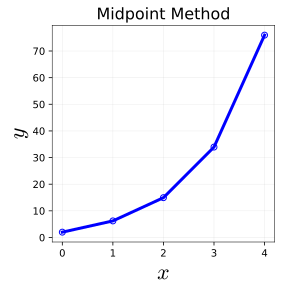

In [79]:
import numpy as np

# defining the Right-Hand Side (RHS) of the ODE
dy_dt = lambda t, y: 4 * np.exp(0.8 * t) - 0.5 * y

# generating the t vector
h = 1
t = np.arange(0, 5, h)

# setting initial condition
y0 = 2

y = midpoint_ode(dy_dt, t, y0, with_plot=True)

### Example 2

Solve  the  following  problem over  the  interval  from $t$ = 0 to 3 using a step size of 0.5 where $y(0)$ = 1. Display all your results on the same graph.

$$
\frac{dy}{dt} = -y + t^2
$$

Obtain the solution analytically and using the midpoint method.

**Solution:**  
Analytical solution is:

$$
y = t^2 - 2(t-1) - \frac{1}{e^t}
$$


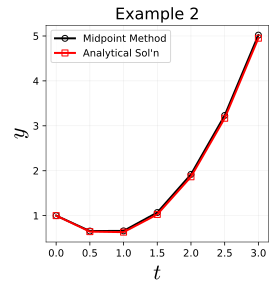

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# defining the Right-Hand Side (RHS) of the ODE
def dy_dt(t,y): return -y + t**2

def analytical(t): return t**2 - 2*(t-1) - 1/np.exp(t)

# generating the t vector
h = 0.5
t = np.arange(0., (3 + h), h)

# setting initial condition
y0 = 1

y = midpoint_ode(dy_dt, t, y0, with_plot=False)

y_a = analytical(t)

# Plotting both lines
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, y, label = "Midpoint Method", linewidth=2, marker='o', markerfacecolor='none', color='black')
ax.plot(t, y_a, label = "Analytical Sol\'n", linewidth=2, marker='s', markerfacecolor='none', color='red')
ax.set_title('Example 2')
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.grid(linewidth=0.5, alpha=0.25)

## Fourth-Order Runge-Kutta Method

This method uses a weighted sum of four different slope estimates to find a value of the slope over an interval (this is why it is called fourth-order). It involves more calculations than the Euler or Midpoint methods, but is generally considered more accurate.

### Function

In [81]:
def RK4_ode(dy_dt, t, y0, with_plot=False):
    '''
    This function solves a first-order ODE of the type dy/dy = f(t, y) over a specified time-span
    using the classical fourht-order Runge-Kutta method.
    
    Returns:
    y = Numerical solution vector of the ODE
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # step size
    h = t[1] - t[0]
    
    y = np.zeros(t.size)

    # setting initial condition
    y[0] = y0

    # solving in time _______________________________
    for i in range(0, t.size - 1):
        
        if np.isnan(y[i]):
            y[i] = 0
            break
            
        k1 = dy_dt(t[i], y[i])
        k2 = dy_dt(t[i] + 0.5 * h, y[i] + 0.5 * k1 * h)
        k3 = dy_dt(t[i] + 0.5 * h, y[i] + 0.5 * k2 * h)
        k4 = dy_dt(t[i] + h, y[i] + k3 * h)

        y[i+1] = y[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * h
            
    # plotting _______________________________
    if with_plot:
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.plot(t, y, linewidth=3, color='olive')
        
        ax.set_title('4th-Order Runge-Kutta Method')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.grid(linewidth=0.5, alpha=0.25)
        
    return y

### Example 1: Basic First-Order ODE

Using the RK4 (Fourth-order Runge-Kutta) method, solve the following 1<sup>st</sup> order ODE:

$$
\frac{dy}{dt} = 4e^{0.8t} - 0.5 y\quad,\quad 0 < t \leqslant 4\quad,\quad y(0) = 2
$$

The same ODE is solved with Euler's method [here](#Euler_Ex1)

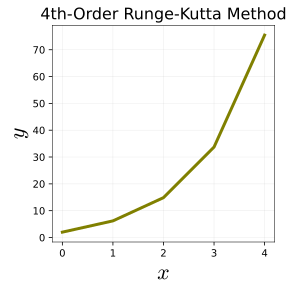

In [82]:
import numpy as np

# defining the Right-Hand Side (RHS) of the ODE
dy_dt = lambda t, y: 4 * np.exp(0.8 * t) - 0.5 * y

# generating the t vector
h = 1
t = np.arange(0, 5, h)

# setting initial condition
y0 = 2

y = RK4_ode(dy_dt, t, y0, with_plot=True)

### Example 2: Tank Drain Time

> A spherical tank has a circular orifice in its bottom through which liquid flows out. The flow rate can be estimated as:
$$
Q = C A \sqrt{2 g h}
$$
where $ Q \; (m^3/s) $ is the outflow, $ C = 0.55 $ an empirical constant, $ A \; (m^2) $ the area of the orifice, $ g = 9.81 \; m/s^2 $, and $ h \; (m) $ the depth of liquid in the tank. Take the initial height to be $ h_0 = 2.75 \; m $, the radius of the tank to be $ R = 1.5 \; m $ and radius of the orifice $ r = 0.015 \; cm $. Note that the volume of liquid in the tank for height $ h $ is given by:
$$
V = \pi h^2 \left( \frac{3R - h}{3} \right)
$$
Set up the differential equation governing this problem, and solve it to find the time it takes to drain the tank completely. <p style="text-align:center;">
<img src="images/tank.png" width=300>
</p>

**Solution:** Since the flow rate out of the tank is equal to the negative of the change of liquid volume inside the tank, we have:

$$
Q = \frac{dV}{dt} = - C A \sqrt{2 g h}
$$

Using the formula we have for $ V $, we can use the chain rule and compute $ \frac{dV}{dt} $:

$$
\frac{dV}{dt} = (2 \pi R h - \pi h^2) \frac{dh}{dt}
$$

Now we can substitute this in our original equation to obtain the ODE governing the problem:

$$
\frac{dh}{dt} = \frac{ -C A \sqrt{2 g h}}{(2 \pi R h - \pi h^2)}
$$

This ODE can be solved with any of the methods we have learned. Here, we choose the 4th-order Runge-Kutta method with a step size of $ \Delta t = 10 \; s $ for $ 0 \leqslant t \leqslant 10000 $:

In [83]:
# Problem parameters
g = 9.81
r = 0.015
A = np.pi * r**2
C = 0.55
R = 1.5

# definig the Right-Hand Side (RHS) of the ODE
dh_dt = lambda t, h: -(C * A * np.sqrt(2 * g * h)) / (np.pi * (2 * R * h - h**2))

# generating the t vector
h = 10
t = np.arange(0, 10000, h)

# setting initial condition
h0 = 2.75

In [84]:
h = RK4_ode(dh_dt, t, h0, with_plot=False)

C:\Users\Arman\miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


The RK4 function gives a warning since after the tank is empty, $ h $ becomes negative and that makes the value under the square root ($ \sqrt{2 g h} $) a negative value which is undefined. However, we are only concerned the positive values of $ h $. So we find the last positive value in vector `h`, and obtain the corresponding time with that value. That is the time when the tank is fully emptied: 

In [85]:
hours = t[h > 0][-1] / 3600

print(f'It takes {hours:.2f} hours to drain the tank.')

It takes 2.08 hours to drain the tank.


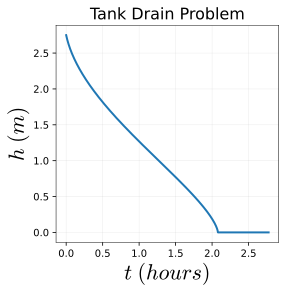

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t/3600, h, linewidth=2)

ax.set_title('Tank Drain Problem')
ax.set_xlabel('$t \; (hours)$')
ax.set_ylabel('$h \; (m)$')
ax.grid(linewidth=0.5, alpha=0.25)

> **Does this result seem physical to you? Can you provide an argument to justify your result?**

## Euler Method for System of ODEs

The Euler method can be expanded to solve a system of first-order ODEs. Recall, a higher-order ODE can be converted to a system of first-order ODEs.

### Function

In [87]:
def euler_ode_sys(dy_dt, t, y0):
    '''
    This function solves a system of first-order ODEs of the type
    [dy1/dt, dy2/dt, ..., ] = [f1(t, y1, y2, ...), f2(t, y1, y2, ...), ...]
    over a specified time-span using Euler's method.
    
    Input:
    dy_dt: list of RHS functions
    y0: list of initial conditions
    
    Returns:
    sol = Numerical solution vector of the ODE with each column corresponding
    to each unknown function y1, y2, ..., yn.
    '''
    
    import numpy as np
    
    # step size
    h = t[1] - t[0]
    
    # number of equations _______________________________
    n = len(y0)
    
    sol = np.zeros((t.size, n))

    # setting initial condition _______________________________
    for j in range(n):
        sol[0, j] = y0[j]

    # solving in time _______________________________
    for i in range(0, t.size - 1):
        
        # loop over all equations
        for j in range(n):
            
            RHS = dy_dt(t[i], sol[i, :])
            sol[i+1, j] = sol[i, j] + RHS[j] * h
        
    return sol

### Example 1: Mass-Spring-Damper Problem (Second Order ODE)

> The motion of a damped spring-mass system is described by the following ODE:
$$
m \frac{d^2 x}{dt^2} + c \frac{dx}{dt} + k x = 0
$$<p style="text-align:center;">
<img src="images/spring_mass.png" width=300></p> Convert this second-order ODE to a system of first order ODEs.


**Solution:** We can always convert linear high order ODEs to a system of first-order ODEs by change of variables. For the above ODE, we can do the following change of variables:
$$
v = \frac{dx}{dt}
$$
Upon doing that, the original 2nd-order ODE can be written as:
$$
m \frac{dv}{dt} + c v + k x = 0
$$
We can rearrange and write:
$$
\begin{align}
\frac{dx}{dt} & = v(t) \\
\frac{dv}{dt} & = - \frac{1}{m} (c v(t) + k x(t))
\end{align}
$$
This system can now be solved with any of the methods we learned previously, since although we have a system of ODEs, but the equations are first-order. Let's solve this system of ODEs with the Euler's method with $ m = 20 \; kg $, $ c = 5 \; N\cdot/m $ and $ k = 20 \; N/m $ in the time span $ 0 \leqslant t \leqslant 50 \; s $. We take the initial conditions as:
$$
\begin{align}
x(0) & = 1\\
v(0) & = 0
\end{align}
$$

In [88]:
# problem parameters
m, c, k = 20, 5, 20

h = 0.01
t = np.arange(0, 50, h)

# defining the RHS functions _______________________________
def dy_dt(t, y):
    dy_dt = [
            y[1],
           -(1 / m) * (c * y[1] + k * y[0])
          ]
    return dy_dt

# initial conditions _______________________________
y0 = [1, 0]

# calling our function _______________________________
sol = euler_ode_sys(dy_dt, t, y0)

Now that we have the solution for $ x $ and $ v $ as columns of the `sol` vector, let's plot them versus time:

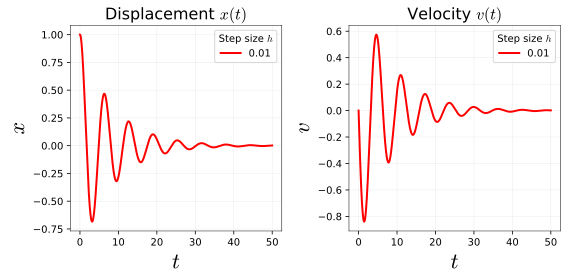

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), tight_layout=True)

ax[0].plot(t, sol[:, 0], linewidth=2, label=f'{h:4g}', color='red')
ax[0].set_title('Displacement $x(t)$')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x$')
ax[0].grid(linewidth=0.5, alpha=0.25)
ax[0].legend(title='Step size $h$')

ax[1].plot(t, sol[:, 1], linewidth=2, label=f'{h:4g}', color='red')
ax[1].set_title('Velocity $v(t)$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$v$')
ax[1].grid(linewidth=0.5, alpha=0.25)
ax[1].legend(title='Step size $h$')

### Example 2

Given the initial conditions, $y(0)$ =  1 and $y′(0)$ =  0, solve the following initial-value problem from $t$ = 0 to 4:

$$
\frac{d^2y}{dt^2} + 9y = 0
$$

Obtain the solution with Euler's method. Plot the result along with the exact solution $y = cos(3t)$.

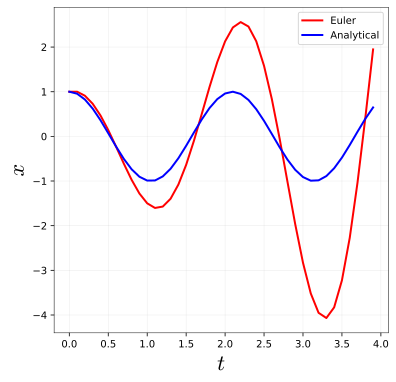

In [90]:
import numpy as np

h = 0.1
t = np.arange(0, 4, h)

# defining the RHS functions _______________________________
def dy_dt(t, y):
    dy_dt = [
            y[1],
           -9*y[0]
          ]
    return dy_dt

# initial conditions _______________________________
y0 = [1, 0]

# calling our function _______________________________
sol = euler_ode_sys(dy_dt, t, y0)

# analytical solution _____________________________
y_an = np.cos(3*t)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(t, sol[:, 0], linewidth=2, label='Euler', color='red')
ax.plot(t, y_an, linewidth=2, label='Analytical', color='blue')
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.grid(linewidth=0.5, alpha=0.25)
ax.legend()

## RK4 Method for System of ODEs

The implementation is similar to the Python function euler_ode_sys except that at each time step we use a RK4 integration scheme. The function is given below:

### Function

In [91]:
def RK4_ode_sys(dy_dt, t, y0):
    '''
    This function solves a system of first-order ODEs of the type
    [dy1/dt, dy2/dt, ..., ] = [f1(t, y1, y2, ...), f2(t, y1, y2, ...), ...]
    over a specified time-span using the classical fourth-order Runge-Kutta method.
    
    Input:
    dy_dt: list of RHS functions
    y0: list of initial conditions
    
    Returns:
    sol = Numerical solution vector of the ODE with each column corresponding
    to each unknown function y1, y2, ..., yn.
    '''
    
    import numpy as np
    
    # step size
    h = t[1] - t[0]
    
    # number of equations _______________________________
    n = len(y0)
    
    sol = np.zeros((t.size, n))

    # setting initial condition _______________________________
    for j in range(n):
        sol[0, j] = y0[j]
    
    # solving in time _______________________________
    for i in range(0, t.size - 1):
        
        # loop over all equations
        for j in range(n):
            
            k1 = dy_dt(t[i], sol[i, :])
            
            k2 = dy_dt(t[i] + 0.5 * h, sol[i, :] + 0.5 * k1 * h)
            k3 = dy_dt(t[i] + 0.5 * h, sol[i, :] + 0.5 * k2 * h)
            k4 = dy_dt(t[i] + h, sol[i, :] + k3 * h)
            
            phi = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
            
            sol[i+1, j] = sol[i, j] + phi[j] * h
        
    return sol

### Example 1: Bungee Jumper Problem

Here we would like to solve the following system of ODEs:
$$
\begin{align}
\frac{dx}{dt} & = v(t) \\
\frac{dv}{dt} & = g - \frac{c_d}{m} v(t)^2 
\end{align}
$$
where $x(t)$ is the downwards oriented vertical position of the jumper and $v(t)$ is the downwards oriented velocity of the jumper. The 2nd equation is Newton's law, i.e., acceleration is balanced by sum the exerted forces, and the 1st equation is a simple kinematic equation, i.e., the time derivative of position is velocity.

We need initial conditions on $x$ and $v$. Here we take $x(0)=0$ and $v(0)=0$. We also set $g=9.81$, $m=68.1$ and $c_d=0.25$ and solve for $0<t\leq 50$.

The analytical solution with $x(0)=0$ and $v(0)=0$ is:

$$
\begin{align}
x(t) & =  \frac{m}{c_d} \log\left( \cosh\left( \sqrt{\frac{g c_d}{m}} t \right) \right) \\
y(t) & = \sqrt{\frac{gm}{c_d}} \tanh\left( \sqrt{\frac{g c_d}{m}} t \right)
\end{align}
$$

In [92]:
# problem parameters
g = 9.81
m = 68.1
cd = 0.25

# step size
h = 2

# initializing time and solution vector
t = np.arange(0, 50, h)
t_plot = np.linspace(0, 50, 100)

# defining the RHS functions _______________________________
def dy_dt(t, y):
    dy_dt = np.array([
            y[1],
            g - (cd * y[1]**2 / m)
          ])
    return dy_dt

# initial conditions
y0 = [0, 0]

# calling our function _______________________________
solRK4 = RK4_ode_sys(dy_dt, t, y0)

In [93]:
# analytical solution _______________________________
x_a = (m / cd) * np.log(np.cosh(np.sqrt(g * cd / m) * t_plot))
v_a = np.sqrt(g * m / cd) * np.tanh(np.sqrt(g * cd / m) * t_plot)

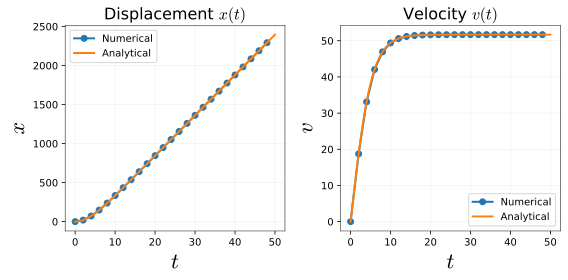

In [94]:
# plotting _______________________________
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), tight_layout=True)
ax[0].plot(t, solRK4[:, 0], linewidth=2, marker='o', label='Numerical')
ax[0].plot(t_plot, x_a, linewidth=2, label='Analytical')

ax[1].plot(t, solRK4[:, 1], linewidth=2, marker='o', label='Numerical')
ax[1].plot(t_plot, v_a, linewidth=2, label='Analytical')

ax[0].set_title('Displacement $x(t)$')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x$')
ax[0].grid(linewidth=0.5, alpha=0.25)
ax[0].legend()

ax[1].set_title('Velocity $v(t)$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$v$')
ax[1].grid(linewidth=0.5, alpha=0.25)
ax[1].legend()

### Example 2: Batch Reactor Concentration and Temperature

A  nonisothermal  batch  reactor  can  be  described  by  the following equations:

$$
\begin{align}
\frac{dC}{dt} &= -e^\frac{-10}{T+273}C\\
\frac{dT}{dt} &= 1000e^\frac{-10}{T+273}C - 10(T - 20)
\end{align}
$$

where $C$ is the concentration of the reactant and $T$ is the temperature of the reactor. Initially, the reactor is  at 15 °C and has a concentration of reactant C of 1.0 gmol/L. Find the concentration and temperature of the reactor as a function of time.

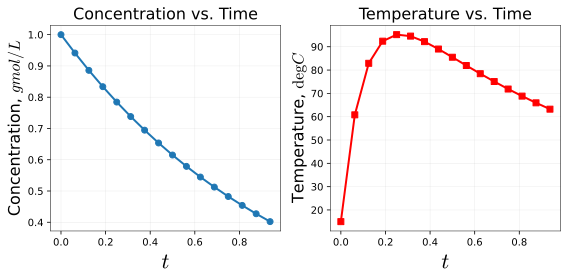

In [95]:
import numpy as np

# step size
h = 1/16

# initializing time and solution vector
t = np.arange(0, 1, h)

# defining the RHS functions _______________________________
def dy_dt(t, y):
    dy_dt = np.array([
            -np.exp(-10/(y[1]+273))*y[0],
            1000*np.exp(-10/(y[1]+273))*y[0] - 10*(y[1]-20)
          ])
    return dy_dt

# initial conditions
y0 = [1, 15]

# calling our function _______________________________
solRK4 = RK4_ode_sys(dy_dt, t, y0)

# solution arrays _______________________________
C = solRK4[:, 0]
T = solRK4[:, 1]

# plotting _______________________________
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), tight_layout=True)
ax[0].plot(t, C, linewidth=2, marker='o', label='Concentration')
ax[1].plot(t, T, linewidth=2, marker='s', color='r', label='Temperature')

ax[0].set_title('Concentration vs. Time')
ax[0].set_xlabel('$ t $')
ax[0].set_ylabel('Concentration, $ gmol/L $', fontsize=16)
ax[0].grid(linewidth=0.5, alpha=0.25)

ax[1].set_title('Temperature vs. Time')
ax[1].set_xlabel('$ t $')
ax[1].set_ylabel('Temperature, $\deg C$', fontsize=16)
ax[1].grid(linewidth=0.5, alpha=0.25)

## Boundary Value Problems

The Python SciPy package has the function `solve_bvp(fun, bc, x, y, verbose = 0)` which solves a first order ODE or system of ODEs when given:
* `fun`: the right hand side of the system
* `bc`: the function evaluating the boundary conditions (may be constants)
* `x`: the initial mesh
* `y`: initial guess for function values at the mesh nodes
* `verbose`: pass 0 for silent operation, 1 for a final solution report, and 2 for progress displayed during iterations. **Helpful for troubleshooting.**

The documentation for this function may be found [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html)

### Example 1

A steady-state heat balance for a rod can be represented as

$$
\frac{d^2T}{dx^2} - 0.15 T = 0
$$

Obtain a solution for a 10m rod with $T(0) = 240$ and $T(10) = 150$. Compare the results to the approximate analytical solution 
$T = 3.0169e^{\sqrt{0.15}x}+236.9831e^{-\sqrt{0.15}x}$

**Solution:**

First, turn the second order ODE into a system of first order ODEs:

$$
\begin{align}
\frac{dT}{dx} & = z(x) \\
\frac{dz}{dx} & = 0.15T(x) 
\end{align}
$$

Then input the system and boundary conditions into `solve_bvp()`

> **Challenge:** Repeat with the right end insulated and the left end temperature fixed at 240

Solved in 2 iterations, number of nodes 12. 
Maximum relative residual: 8.78e-04 
Maximum boundary residual: 0.00e+00


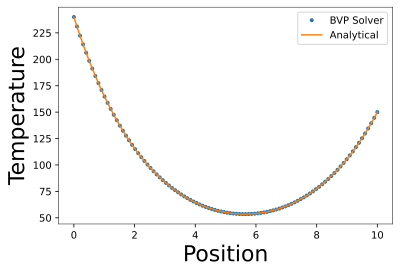

In [96]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(x, y):
    return np.vstack((y[1], 0.15*y[0]))

def bc(ya, yb):
    return np.array([ya[0]-240, yb[0]-150])

x = np.linspace(0, 10, 10)
y_a = np.zeros((2, x.size))

res = solve_bvp(fun, bc, x, y_a, verbose = 1)

x_plot = np.linspace(0, 10, 100)
y_plot = res.sol(x_plot)[0]


#Analytical
y_analy = 3.0169*np.exp(np.sqrt(0.15)*x_plot)+236.9831*np.exp(-np.sqrt(0.15)*x_plot)

plt.plot(x_plot, y_plot, '.', label = 'BVP Solver')
plt.plot(x_plot, y_analy, label = 'Analytical')
plt.legend()
plt.xlabel("Position")
plt.ylabel("Temperature")
plt.show()

# References

1. Chapra, S. (2011). Applied Numerical Methods W/MATLAB. New York: McGraw-Hill Science/Engineering/Math.